<a href="https://colab.research.google.com/github/tilakn2/YouTube-engagement-analyzer/blob/main/youtube_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
READING THE JSON FILE AFTER EXTRACTING USING YOUTUBE API

In [ ]:
import pandas as pd

In [ ]:
#file = pd.read_json(r'/Users/tilaknarendran/Downloads/Takeout/YouTube and YouTube Music/history')
import os
import json

directory_path = '/Users/tilaknarendran/Downloads/Takeout/YouTube and YouTube Music/history'
files = os.listdir(directory_path)
print(files)

['search-history.json', 'watch-history.json']


In [ ]:
import os
import json
import pandas as pd

# Set the path to the watch-history.json file
directory_path = '/Users/tilaknarendran/Downloads/Takeout/YouTube and YouTube Music/history'
watch_history_file = os.path.join(directory_path, 'watch-history.json')

# Open and read the JSON file
with open(watch_history_file, 'r') as file:
    watch_history_data = json.load(file)

# Convert the JSON data to a DataFrame (adjust the flattening process if needed)
df = pd.json_normalize(watch_history_data)

# Print the first few rows of the DataFrame to verify
print("\nDataFrame preview:")
print(df.head())

# Save the DataFrame to a CSV file in an accessible location
output_path = '/Users/tilaknarendran/Desktop/youtube_watch_history.csv'  # Example location
df.to_csv(output_path, index=False)

print(f"CSV file has been saved to {output_path}")


In [ ]:
df.head()

In [ ]:
for item in os.listdir(directory_path):
    file_path = os.path.join(directory_path, item)
    if os.path.isfile(file_path):
        # Now you can open and read the file safely
        with open(file_path, 'r') as f:
            print(f.read())

In [ ]:
import os
import pandas as pd

# Define the path to the directory
directory_path = '/Users/tilaknarendran/Downloads/Takeout/YouTube and YouTube Music/history'

# Initialize an empty DataFrame
data = pd.DataFrame()

# Loop through each file in the directory
for item in os.listdir(directory_path):
    file_path = os.path.join(directory_path, item)

    # Check if the path is a file (not a directory)
    if os.path.isfile(file_path):
        # Try loading the file data into a DataFrame
        try:
            # If the files are JSON
            if item.endswith('.json'):
                df = pd.read_json(file_path)
            # If the files are CSV
            elif item.endswith('.csv'):
                df = pd.read_csv(file_path)
            else:
                print(f"Skipping unsupported file format: {item}")
                continue

            # Append the data from this file to the main DataFrame
            data = pd.concat([data, df], ignore_index=True)

        except Exception as e:
            print(f"Error reading {item}: {e}")

# Display the DataFrame
print(data)


In [ ]:
data

YOUTUBE WATCH HISTORY ANALYSIS BEGINS FROM HERE

CREATING DATASET USING YOUTUBE API AND WEB SCRAPING USING BEAUTIFULSOUP4

In [ ]:
pip install pandas requests

In [ ]:
df.head()

,header,title,titleUrl,time,products,activityControls,description,details,subtitles
0,YouTube,Watched https://www.youtube.com/watch?v=dto8jG...,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14T04:45:03.422Z,[YouTube],[YouTube watch history],NaN,NaN,NaN
1,YouTube,Watched https://www.youtube.com/watch?v=wObV_h...,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14T04:39:53.209Z,[YouTube],[YouTube watch history],NaN,NaN,NaN
2,YouTube,Watched https://www.youtube.com/watch?v=LktbfH...,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14T04:39:40.499Z,[YouTube],[YouTube watch history],NaN,NaN,NaN
3,YouTube,Watched https://www.youtube.com/watch?v=YJucKl...,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14T04:33:47.773Z,[YouTube],[YouTube watch history],NaN,NaN,NaN
4,YouTube,Watched https://www.youtube.com/watch?v=SN8ZHF...,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14T03:55:36.705Z,[YouTube],[YouTube watch history],NaN,NaN,NaN


In [ ]:
import os
import json
import pandas as pd
import requests


API_KEY = 'Your_api_key'

# Function to get video title from YouTube using the video ID
def get_video_title(video_id):
    url = f'https://www.googleapis.com/youtube/v3/videos?part=snippet&id={video_id}&key={API_KEY}'
    response = requests.get(url)
    data = response.json()

    if 'items' in data and len(data['items']) > 0:
        return data['items'][0]['snippet']['title']
    return None

# Set the path to the watch-history.json file
directory_path = '/Users/tilaknarendran/Downloads/Takeout/YouTube and YouTube Music/history'
watch_history_file = os.path.join(directory_path, 'watch-history.json')

# Open and read the JSON file
with open(watch_history_file, 'r') as file:
    watch_history_data = json.load(file)

# Convert the JSON data to a DataFrame
df = pd.json_normalize(watch_history_data)

# Function to extract video ID from the URL
def extract_video_id(url):
    if isinstance(url, str):

        video_id = url.split('v=')[-1]
        return video_id.split('&')[0]
    return None


df['video_id'] = df['titleUrl'].apply(extract_video_id)


df = df.head(10000)


def fetch_titles_limited(df, limit=10000):
    video_titles = []
    count = 0

    for video_id in df['video_id']:
        if count >= limit:
            break


        title = get_video_title(video_id)
        video_titles.append(title)


        count += 1

    return video_titles


df['video_title'] = fetch_titles_limited(df, limit=10000)


print(df[['title', 'video_title']].head())


output_path = '/Users/tilaknarendran/Desktop/youtube_watch_history_with_titles_limited.csv'
df.to_csv(output_path, index=False)

print(f"CSV file with video titles saved to {output_path}")


                                               title  \
0  Watched https://www.youtube.com/watch?v=dto8jG...   
1  Watched https://www.youtube.com/watch?v=wObV_h...   
2  Watched https://www.youtube.com/watch?v=LktbfH...   
3  Watched https://www.youtube.com/watch?v=YJucKl...   
4  Watched https://www.youtube.com/watch?v=SN8ZHF...   

                                         video_title  
0         How to download your Youtube watch history  
1  10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...  
2  Business Analyst Training Full course  (Step b...  
3  Fastest Way to Become a Business Analyst (Busi...  
4  day in the life of a Business Analyst at Spoti...  
CSV file with video titles saved to /Users/tilaknarendran/Desktop/youtube_watch_history_with_titles_limited.csv


In [ ]:
df['time'] = pd.to_datetime(df['time'], errors='coerce', utc=True)
df_sorted = df.sort_values(by='time', ascending=False)

In [ ]:
df_sorted.head(100)

,header,title,titleUrl,time,products,activityControls,description,details,subtitles,video_id,video_title
0,YouTube,Watched https://www.youtube.com/watch?v=dto8jG...,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,[YouTube],[YouTube watch history],NaN,NaN,NaN,dto8jGMxHxY,How to download your Youtube watch history
1,YouTube,Watched https://www.youtube.com/watch?v=wObV_h...,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,[YouTube],[YouTube watch history],NaN,NaN,NaN,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...
2,YouTube,Watched https://www.youtube.com/watch?v=LktbfH...,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,[YouTube],[YouTube watch history],NaN,NaN,NaN,LktbfHdEm-U,Business Analyst Training Full course (Step b...
3,YouTube,Watched https://www.youtube.com/watch?v=YJucKl...,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,[YouTube],[YouTube watch history],NaN,NaN,NaN,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...
4,YouTube,Watched https://www.youtube.com/watch?v=SN8ZHF...,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,[YouTube],[YouTube watch history],NaN,NaN,NaN,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...
...,...,...,...,...,...,...,...,...,...,...,...
95,YouTube,Watched https://www.youtube.com/watch?v=_MQuFG...,https://www.youtube.com/watch?v=_MQuFG52b7Y,2024-11-09 19:06:09.879000+00:00,[YouTube],[YouTube watch history],NaN,NaN,NaN,_MQuFG52b7Y,Exercise Scientist Critiques Strongman Brian Shaw
96,YouTube,Watched https://www.youtube.com/watch?v=fYZx-f...,https://www.youtube.com/watch?v=fYZx-fISCUs,2024-11-08 22:53:05.192000+00:00,[YouTube],[YouTube watch history],NaN,NaN,NaN,fYZx-fISCUs,15 Min Yoga Nidra | Reset Your Nervous System
97,YouTube,Watched https://www.youtube.com/watch?v=v87BX0...,https://www.youtube.com/watch?v=v87BX0bJK8Y,2024-11-08 22:52:16.984000+00:00,[YouTube],[YouTube watch history],NaN,NaN,NaN,v87BX0bJK8Y,NSDR Non Sleep Deep Rest | 10 Minute Yoga Nidra
98,YouTube,Watched https://www.youtube.com/watch?v=0A-QoX...,https://www.youtube.com/watch?v=0A-QoXNSowE,2024-11-08 17:25:21.553000+00:00,[YouTube],[YouTube watch history],NaN,NaN,NaN,0A-QoXNSowE,Trust Fund Kids & Minimum Wage Workers Play Tr...


EXTRACTING CHANNEL AND VIDEO CATEGORY

In [ ]:

API_KEY = 'your_api_key'


CATEGORY_ID_MAP = {
    '1': 'Film & Animation',
    '2': 'Autos & Vehicles',
    '10': 'Music',
    '15': 'Pets & Animals',
    '17': 'Sports',
    '18': 'Short Movies',
    '19': 'Travel & Events',
    '20': 'Gaming',
    '21': 'Videoblogging',
    '22': 'People & Blogs',
    '23': 'Comedy',
    '24': 'Entertainment',
    '25': 'News & Politics',
    '26': 'How-to & Style',
    '27': 'Education',
    '28': 'Science & Technology',
    '29': 'Nonprofits & Activism',
    '30': 'Movies',
    '31': 'Shows',
    '32': 'Documentary',
    '33': 'Sports & Fitness'
}


def get_video_details(video_id):
    url = f'https://www.googleapis.com/youtube/v3/videos?part=snippet&id={video_id}&key={API_KEY}'
    response = requests.get(url)
    data = response.json()

    if 'items' in data and len(data['items']) > 0:
        video_details = data['items'][0]['snippet']
        title = video_details['title']
        channel = video_details['channelTitle']
        category_id = video_details['categoryId']

        # Map category_id to human-readable category name
        category = CATEGORY_ID_MAP.get(category_id, 'Unknown')

        return title, channel, category
    return None, None, None

# Set the path to the watch-history.json file
directory_path = '/Users/tilaknarendran/Downloads/Takeout/YouTube and YouTube Music/history'
watch_history_file = os.path.join(directory_path, 'watch-history.json')

# Open and read the JSON file
with open(watch_history_file, 'r') as file:
    watch_history_data = json.load(file)

# Convert the JSON data to a DataFrame
df = pd.json_normalize(watch_history_data)

# Function to extract video ID from the URL
def extract_video_id(url):
    if isinstance(url, str):

        video_id = url.split('v=')[-1]
        return video_id.split('&')[0]
    return None


df['video_id'] = df['titleUrl'].apply(extract_video_id)

# Fetch video details (title, channel, category) for each video ID
df[['video_title', 'channel', 'category']] = df['video_id'].apply(lambda x: pd.Series(get_video_details(x)))

# Clean up columns to remove quotes and extra spaces
df['video_title'] = df['video_title'].str.replace('"', '').str.strip()  # Remove quotes
df['channel'] = df['channel'].str.replace('"', '').str.strip()  # Remove quotes
df['category'] = df['category'].str.replace('"', '').str.strip()  # Remove quotes

# Now the DataFrame will have the cleaned-up video title, channel, and category columns
print(df[['video_title', 'channel', 'category']].head())  # Show the updated DataFrame

# Optionally, save the DataFrame with video titles, channel, and category to a CSV
output_path = '/Users/tilaknarendran/Desktop/youtube_watch_history_with_details.csv'
df.to_csv(output_path, index=False)

print(f"CSV file with video details saved to {output_path}")


  video_title channel category
0        None    None     None
1        None    None     None
2        None    None     None
3        None    None     None
4        None    None     None
CSV file with video details saved to /Users/tilaknarendran/Desktop/youtube_watch_history_with_details.csv


In [ ]:
df_sorted.head()

,header,title,titleUrl,time,products,activityControls,description,details,subtitles,video_id,video_title
0,YouTube,Watched https://www.youtube.com/watch?v=dto8jG...,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,[YouTube],[YouTube watch history],NaN,NaN,NaN,dto8jGMxHxY,How to download your Youtube watch history
1,YouTube,Watched https://www.youtube.com/watch?v=wObV_h...,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,[YouTube],[YouTube watch history],NaN,NaN,NaN,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...
2,YouTube,Watched https://www.youtube.com/watch?v=LktbfH...,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,[YouTube],[YouTube watch history],NaN,NaN,NaN,LktbfHdEm-U,Business Analyst Training Full course (Step b...
3,YouTube,Watched https://www.youtube.com/watch?v=YJucKl...,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,[YouTube],[YouTube watch history],NaN,NaN,NaN,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...
4,YouTube,Watched https://www.youtube.com/watch?v=SN8ZHF...,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,[YouTube],[YouTube watch history],NaN,NaN,NaN,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...


In [ ]:
yt_hist = df_sorted.drop(['header','title','products','activityControls','details','subtitles'],axis=1)

In [ ]:
yt_hist

,titleUrl,time,description,video_id,video_title
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,NaN,dto8jGMxHxY,How to download your Youtube watch history
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,NaN,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,NaN,LktbfHdEm-U,Business Analyst Training Full course (Step b...
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,NaN,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,NaN,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...
...,...,...,...,...,...
5495,https://www.youtube.com/watch?v=_bVO704DQSs,NaT,NaN,_bVO704DQSs,The claw spa!
5578,https://www.youtube.com/watch?v=f_Gx0SslMGc,NaT,NaN,f_Gx0SslMGc,Goldilocks and the Three Bears
6189,https://www.youtube.com/watch?v=dpdG1s3SMwM,NaT,NaN,dpdG1s3SMwM,Student Visa For US - Most Asked Question Answ...
7964,https://www.youtube.com/watch?v=lOMnCRrrAvM,NaT,NaN,lOMnCRrrAvM,None


In [ ]:
yt_hist.drop(['description'],axis=1)

,titleUrl,time,video_id,video_title
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,dto8jGMxHxY,How to download your Youtube watch history
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,LktbfHdEm-U,Business Analyst Training Full course (Step b...
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...
...,...,...,...,...
5495,https://www.youtube.com/watch?v=_bVO704DQSs,NaT,_bVO704DQSs,The claw spa!
5578,https://www.youtube.com/watch?v=f_Gx0SslMGc,NaT,f_Gx0SslMGc,Goldilocks and the Three Bears
6189,https://www.youtube.com/watch?v=dpdG1s3SMwM,NaT,dpdG1s3SMwM,Student Visa For US - Most Asked Question Answ...
7964,https://www.youtube.com/watch?v=lOMnCRrrAvM,NaT,lOMnCRrrAvM,None


In [ ]:
# Ensure the 'time' column is in datetime format
yt_hist['time'] = pd.to_datetime(yt_hist['time'], errors='coerce')

# Create new columns for year, month, and day
yt_hist['year'] = yt_hist['time'].dt.year
yt_hist['month'] = yt_hist['time'].dt.month
yt_hist['day'] = yt_hist['time'].dt.day

# Combine hour, minute, and second into a single 'time_of_day' column
yt_hist['time_of_day'] = yt_hist['time'].dt.strftime('%H:%M:%S')

# Print the first few rows to see the result
yt_hist[['titleUrl', 'time', 'year', 'month', 'day', 'time_of_day']].head()

In [ ]:
yt_hist

,titleUrl,time,description,video_id,video_title,year,month,day,time_of_day
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,NaN,dto8jGMxHxY,How to download your Youtube watch history,2024.0,11.0,14.0,04:45:03
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,NaN,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,2024.0,11.0,14.0,04:39:53
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,NaN,LktbfHdEm-U,Business Analyst Training Full course (Step b...,2024.0,11.0,14.0,04:39:40
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,NaN,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...,2024.0,11.0,14.0,04:33:47
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,NaN,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...,2024.0,11.0,14.0,03:55:36
...,...,...,...,...,...,...,...,...,...
5495,https://www.youtube.com/watch?v=_bVO704DQSs,NaT,NaN,_bVO704DQSs,The claw spa!,NaN,NaN,NaN,NaN
5578,https://www.youtube.com/watch?v=f_Gx0SslMGc,NaT,NaN,f_Gx0SslMGc,Goldilocks and the Three Bears,NaN,NaN,NaN,NaN
6189,https://www.youtube.com/watch?v=dpdG1s3SMwM,NaT,NaN,dpdG1s3SMwM,Student Visa For US - Most Asked Question Answ...,NaN,NaN,NaN,NaN
7964,https://www.youtube.com/watch?v=lOMnCRrrAvM,NaT,NaN,lOMnCRrrAvM,None,NaN,NaN,NaN,NaN


In [ ]:
yt_hist['video_title'].unique()

In [ ]:
# Drop rows where the 'time' column has missing values
yt_hist_new = yt_hist.dropna(subset=['time']).copy()  # Create a new DataFrame

# Now convert 'year', 'month', and 'day' to integers
yt_hist_new['year'] = yt_hist_new['time'].dt.year.astype(int)
yt_hist_new['month'] = yt_hist_new['time'].dt.month.astype(int)
yt_hist_new['day'] = yt_hist_new['time'].dt.day.astype(int)

# Print the first few rows to verify the conversion
yt_hist_new[['year', 'month', 'day']].head()

,year,month,day
0,2024,11,14
1,2024,11,14
2,2024,11,14
3,2024,11,14
4,2024,11,14


In [ ]:
# Drop rows where 'video_title' is either NA or the string 'None'
yt_hist_new_1 = yt_hist_new.dropna(subset=['video_title'])
yt_hist_new_1 = yt_hist_new[yt_hist_new['video_title'] != "None"]

# Verify the result
yt_hist_new_1.head()

,titleUrl,time,description,video_id,video_title,year,month,day,time_of_day
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,NaN,dto8jGMxHxY,How to download your Youtube watch history,2024,11,14,04:45:03
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,NaN,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,2024,11,14,04:39:53
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,NaN,LktbfHdEm-U,Business Analyst Training Full course (Step b...,2024,11,14,04:39:40
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,NaN,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...,2024,11,14,04:33:47
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,NaN,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...,2024,11,14,03:55:36


In [ ]:
yt_hist_new_1['video_title'].unique()

array(['How to download your Youtube watch history',
       '10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORTFOLIO',
       'Business Analyst Training Full course  (Step by Step Guide ) ( 100 % free course )in 10 hours',
       ..., 'The solution to the Gender debate.',
       'The World’s Most Mysterious Book That No One Can Decode • Mystery Files',
       'Muslim CONFRONTS a Christian'], dtype=object)

PRELIMINARY CHECK AND CLEANING

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(r'/Users/tilaknarendran/Desktop/projects/youtube data analysis/appendix/youtube_watch_history_with_titles_limited.csv')

In [ ]:
yt_hist = df.drop(['header','title','products','activityControls','details','subtitles','description'],axis=1)


In [ ]:
# Ensure the 'time' column is in datetime format
yt_hist['time'] = pd.to_datetime(yt_hist['time'], errors='coerce')

# Create new columns for year, month, and day
yt_hist['year'] = yt_hist['time'].dt.year
yt_hist['month'] = yt_hist['time'].dt.month
yt_hist['day'] = yt_hist['time'].dt.day

# Combine hour, minute, and second into a single 'time_of_day' column
yt_hist['time_of_day'] = yt_hist['time'].dt.strftime('%H:%M:%S')

# Print the first few rows to see the result
yt_hist[['titleUrl', 'time', 'year', 'month', 'day', 'time_of_day']].head()
yt_hist.head()

,titleUrl,time,video_id,video_title,year,month,day,time_of_day
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,dto8jGMxHxY,How to download your Youtube watch history,2024.0,11.0,14.0,04:45:03
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,2024.0,11.0,14.0,04:39:53
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,LktbfHdEm-U,Business Analyst Training Full course (Step b...,2024.0,11.0,14.0,04:39:40
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...,2024.0,11.0,14.0,04:33:47
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...,2024.0,11.0,14.0,03:55:36


In [ ]:
# Drop rows where the 'time' column has missing values
yt_hist_new = yt_hist.dropna(subset=['time']).copy()  # Create a new DataFrame

# Now convert 'year', 'month', and 'day' to integers
yt_hist_new['year'] = yt_hist_new['time'].dt.year.astype(int)
yt_hist_new['month'] = yt_hist_new['time'].dt.month.astype(int)
yt_hist_new['day'] = yt_hist_new['time'].dt.day.astype(int)

# Print the first few rows to verify the conversion
yt_hist_new[['year', 'month', 'day']].head()

,year,month,day
0,2024,11,14
1,2024,11,14
2,2024,11,14
3,2024,11,14
4,2024,11,14


In [ ]:
# Drop rows where 'video_title' is either NA or the string 'None'
yt_hist_new_1 = yt_hist_new.dropna(subset=['video_title'])  # Drop rows with NA values in 'video_title'
yt_hist_new_1 = yt_hist_new[yt_hist_new['video_title'] != "None"]  # Filter out rows where 'video_title' is 'None'

# Verify the result
yt_hist_new_1.head()

,titleUrl,time,video_id,video_title,year,month,day,time_of_day
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,dto8jGMxHxY,How to download your Youtube watch history,2024,11,14,04:45:03
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,2024,11,14,04:39:53
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,LktbfHdEm-U,Business Analyst Training Full course (Step b...,2024,11,14,04:39:40
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...,2024,11,14,04:33:47
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...,2024,11,14,03:55:36


In [ ]:
yt_hist_new.shape

(9986, 8)

In [ ]:
yt_hist = yt_hist_new_1

In [ ]:
output_path = '/Users/tilaknarendran/Desktop/youtube_history_final_dataset.csv'
yt_hist.to_csv(output_path, index=False)

In [ ]:
nan_count = yt_hist['video_title'].isna().count()
nan_count

np.int64(9986)

In [ ]:
yt_hist['video_title'].value_counts()

video_title
Yoga Nidra For Insomnia and Deep Rest - 1.5 Hours                                                       46
Connect with Spirit (Guides) Guided Meditation                                                          28
20 Minute Non-Sleep Deep Rest (NSDR) to Restore Mental & Physical Energy | Dr. Andrew Huberman          25
Sleep Guided Meditation, Meet Your Spirit Guides Whilst Sleeping, Calming Your Mind Meditation          12
Yoga Nidra Insomnia Meditation                                                                          10
                                                                                                        ..
All progress, gone #repost #tiktok #kaicenet #ishowspeed #shorts #shortvideo #funny #memes #gameplay     1
History Textbooks Doesn't Tell Us This... Sandeep Balakrishna #shorts                                    1
U.S Soldier Suprises His Little Brother at School ❤️ #usa #soldier #surprise #brother #school            1
Where Is The Protein In V

In [ ]:
# Filter rows where 'video_title' is NaN
nan_rows = yt_hist[yt_hist['video_title'].isna()]

# Get value_counts of another column in these NaN rows
nan_value_counts = nan_rows['video_id'].value_counts()

print(nan_value_counts)


video_id
PkVvpfld7DQ    15
3dxiUY5umd0    12
DkDGluGrco4     9
g0jfhRcXtLQ     8
5tpeP3SjuyM     8
               ..
Pg2c6nDfnYU     1
YeodmhASdTg     1
Im-A0OZGHg8     1
ZKZJBMDvmV0     1
2wutrRPD86Y     1
Name: count, Length: 3116, dtype: int64


In [ ]:
nan_rows

,titleUrl,time,video_id,video_title,year,month,day,time_of_day
127,https://www.youtube.com/watch?v=HbQgb2zXLyo,2024-11-05 21:48:53.700000+00:00,HbQgb2zXLyo,NaN,2024,11,5,21:48:53
157,https://www.youtube.com/watch?v=uzVOsk971_k,2024-11-05 06:16:03.056000+00:00,uzVOsk971_k,NaN,2024,11,5,06:16:03
343,https://www.youtube.com/watch?v=altYDPmXK3g,2024-10-28 17:53:12.590000+00:00,altYDPmXK3g,NaN,2024,10,28,17:53:12
363,https://www.youtube.com/watch?v=oWxlgpuKc34,2024-10-27 15:12:11.741000+00:00,oWxlgpuKc34,NaN,2024,10,27,15:12:11
429,https://www.youtube.com/watch?v=UUa6zKVic4k,2024-10-24 22:32:32.681000+00:00,UUa6zKVic4k,NaN,2024,10,24,22:32:32
...,...,...,...,...,...,...,...,...
9995,https://www.youtube.com/watch?v=v0eNGSAQ_4o,2024-02-03 05:03:55.630000+00:00,v0eNGSAQ_4o,NaN,2024,2,3,05:03:55
9996,https://www.youtube.com/watch?v=2Fhs7RHX-3M,2024-02-03 00:33:58.859000+00:00,2Fhs7RHX-3M,NaN,2024,2,3,00:33:58
9997,https://www.youtube.com/watch?v=EAj8saFuqBg,2024-02-03 00:33:48.616000+00:00,EAj8saFuqBg,NaN,2024,2,3,00:33:48
9998,https://www.youtube.com/watch?v=g0jfhRcXtLQ,2024-02-02 20:03:15.387000+00:00,g0jfhRcXtLQ,NaN,2024,2,2,20:03:15


In [ ]:
# Function to scrape video title from YouTube link
def scrape_video_title(url):
    try:
        # Send an HTTP GET request to fetch the HTML content
        response = requests.get(url, timeout=10)

        # Check if the request was successful
        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')

            # Extract the title tag
            title_tag = soup.find('title')
            if title_tag:
                # Clean up the title (remove ' - YouTube')
                return title_tag.text.replace(' - YouTube', '').strip()

        # Return None if no title found or response failed
        return None
    except Exception as e:
        print(f"Error fetching title for URL {url}: {e}")
        return None

# Create a copy of the original DataFrame to avoid modifying it directly
yt_hist_copy = yt_hist.copy()

# Iterate through rows where video_title is NaN and scrape titles
for index, row in yt_hist_copy.iterrows():
    if pd.isna(row['video_title']):
        scraped_title = scrape_video_title(row['titleUrl'])
        yt_hist_copy.at[index, 'video_title'] = scraped_title
        print(f"Scraped title for index {index}: {scraped_title}")

        # Introduce a delay to avoid being flagged
        time.sleep(1)  # 1 second delay

# Check the updated DataFrame
yt_hist_copy

In [ ]:
# Filter rows where 'video_title' is empty or NaN
empty_titles_df = yt_hist_copy[yt_hist_copy['video_title'].isna() | (yt_hist_copy['video_title'] == '')]

# Display the rows with empty video titles
empty_titles_df


,titleUrl,time,video_id,video_title,year,month,day,time_of_day
127,https://www.youtube.com/watch?v=HbQgb2zXLyo,2024-11-05 21:48:53.700000+00:00,HbQgb2zXLyo,,2024,11,5,21:48:53
157,https://www.youtube.com/watch?v=uzVOsk971_k,2024-11-05 06:16:03.056000+00:00,uzVOsk971_k,,2024,11,5,06:16:03
343,https://www.youtube.com/watch?v=altYDPmXK3g,2024-10-28 17:53:12.590000+00:00,altYDPmXK3g,,2024,10,28,17:53:12
363,https://www.youtube.com/watch?v=oWxlgpuKc34,2024-10-27 15:12:11.741000+00:00,oWxlgpuKc34,,2024,10,27,15:12:11
429,https://www.youtube.com/watch?v=UUa6zKVic4k,2024-10-24 22:32:32.681000+00:00,UUa6zKVic4k,,2024,10,24,22:32:32
...,...,...,...,...,...,...,...,...
9995,https://www.youtube.com/watch?v=v0eNGSAQ_4o,2024-02-03 05:03:55.630000+00:00,v0eNGSAQ_4o,NaN,2024,2,3,05:03:55
9996,https://www.youtube.com/watch?v=2Fhs7RHX-3M,2024-02-03 00:33:58.859000+00:00,2Fhs7RHX-3M,NaN,2024,2,3,00:33:58
9997,https://www.youtube.com/watch?v=EAj8saFuqBg,2024-02-03 00:33:48.616000+00:00,EAj8saFuqBg,NaN,2024,2,3,00:33:48
9998,https://www.youtube.com/watch?v=g0jfhRcXtLQ,2024-02-02 20:03:15.387000+00:00,g0jfhRcXtLQ,NaN,2024,2,2,20:03:15


In [ ]:
yt_hist_copy.head()

,titleUrl,time,video_id,video_title,year,month,day,time_of_day
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,dto8jGMxHxY,How to download your Youtube watch history,2024,11,14,04:45:03
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,2024,11,14,04:39:53
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,LktbfHdEm-U,Business Analyst Training Full course (Step b...,2024,11,14,04:39:40
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...,2024,11,14,04:33:47
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...,2024,11,14,03:55:36


In [ ]:
# Define the function to get video title from YouTube URL
def get_video_title_from_url(url):
    try:

        response = requests.get(url)
        response.raise_for_status()


        soup = BeautifulSoup(response.text, 'html.parser')

        # Check for title in the <title> tag
        title_tag = soup.find('title')
        if title_tag:
            title = title_tag.text.strip()
            # Remove the "- YouTube" part from the title
            if title.endswith(" - YouTube"):
                title = title[:-9]
        else:
            title = None

        # If the title was not found in <title>, try <meta> property="og:title"
        if not title:
            meta_title = soup.find('meta', property='og:title')
            if meta_title and meta_title.get('content'):
                title = meta_title['content']

        # If the title is still not found, check for an <h1> tag with a specific class
        if not title:
            h1_title = soup.find('h1', class_='title')
            if h1_title:
                title = h1_title.text.strip()

        return title if title else "Title not found"

    except requests.exceptions.RequestException as e:
        print(f"Error fetching page: {e}")
        return "Error"



empty_titles_df['video_title'] = empty_titles_df['titleUrl'].apply(get_video_title_from_url)

empty_titles_df.head()

In [ ]:
# Drop rows where the 'video_title' is NaN or empty
yt_hist_copy = yt_hist_copy[yt_hist_copy['video_title'].notna() & (yt_hist_copy['video_title'] != '')]

# Check the resulting DataFrame
yt_hist_copy.head()


,titleUrl,time,video_id,video_title,year,month,day,time_of_day
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,dto8jGMxHxY,How to download your Youtube watch history,2024,11,14,04:45:03
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,2024,11,14,04:39:53
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,LktbfHdEm-U,Business Analyst Training Full course (Step b...,2024,11,14,04:39:40
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...,2024,11,14,04:33:47
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...,2024,11,14,03:55:36


In [ ]:
yt_hist.shape

(9986, 8)

In [ ]:
yt_hist_cleaned = yt_hist_copy
yt_hist_cleaned.head()

,titleUrl,time,video_id,video_title,year,month,day,time_of_day
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,dto8jGMxHxY,How to download your Youtube watch history,2024,11,14,04:45:03
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,2024,11,14,04:39:53
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,LktbfHdEm-U,Business Analyst Training Full course (Step b...,2024,11,14,04:39:40
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...,2024,11,14,04:33:47
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...,2024,11,14,03:55:36


In [ ]:
year_range = yt_hist_copy['month'].agg(['min', 'max'])
year_range

min     3
max    11
Name: month, dtype: int64

In [ ]:
yt_hist_cleaned

,titleUrl,time,video_id,video_title,year,month,day,time_of_day
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,dto8jGMxHxY,How to download your Youtube watch history,2024,11,14,04:45:03
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,2024,11,14,04:39:53
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,LktbfHdEm-U,Business Analyst Training Full course (Step b...,2024,11,14,04:39:40
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...,2024,11,14,04:33:47
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...,2024,11,14,03:55:36
...,...,...,...,...,...,...,...,...
8584,https://www.youtube.com/watch?v=L2unI7Bp7MI,2024-03-20 06:06:41.175000+00:00,L2unI7Bp7MI,She did not hold back!,2024,3,20,06:06:41
8589,https://www.youtube.com/watch?v=VRSjJtVOuEk,2024-03-20 06:03:07.376000+00:00,VRSjJtVOuEk,What is a passport bro?,2024,3,20,06:03:07
8610,https://www.youtube.com/watch?v=dZ-wy5SbGLQ,2024-03-19 05:45:23.682000+00:00,dZ-wy5SbGLQ,The solution to the Gender debate.,2024,3,19,05:45:23
8622,https://www.youtube.com/watch?v=oUUwmB6Fv2A,2024-03-18 11:07:33.989000+00:00,oUUwmB6Fv2A,The World’s Most Mysterious Book That No One C...,2024,3,18,11:07:33


In [ ]:
def determine_video_type(title):
    if isinstance(title, str):
        if '#' in title or '#shorts' in title.lower():
            return 'Shorts'
    return 'Long Form Video'

yt_hist_cleaned.loc[:, 'video_type'] = yt_hist_cleaned['video_title'].apply(determine_video_type)

In [ ]:
yt_hist_cleaned[yt_hist_cleaned['video_type']=='Shorts']

,titleUrl,time,video_id,video_title,year,month,day,time_of_day,video_type
51,https://www.youtube.com/watch?v=oJc3_dAlF-8,2024-11-12 01:48:50.321000+00:00,oJc3_dAlF-8,how was i supposed to kno they were talkin abt...,2024,11,12,01:48:50,Shorts
52,https://www.youtube.com/watch?v=WuhG0uBE4pw,2024-11-12 01:48:33.873000+00:00,WuhG0uBE4pw,YOUNG THUG BEING WELCOMED HOME WITH A BIG BAG ...,2024,11,12,01:48:33,Shorts
128,https://www.youtube.com/watch?v=8ukYieha1oU,2024-11-05 21:48:41.341000+00:00,8ukYieha1oU,He seriously needs help 😂 #bteamjiujitsu,2024,11,5,21:48:41,Shorts
131,https://www.youtube.com/watch?v=V9fJNOOwS0k,2024-11-05 21:46:54.836000+00:00,V9fJNOOwS0k,Rodman could win over the boss’s daughter on t...,2024,11,5,21:46:54,Shorts
141,https://www.youtube.com/watch?v=GYiBBZIriSQ,2024-11-05 06:26:55.567000+00:00,GYiBBZIriSQ,Floyd Mayweather 🇺🇸 Vs Logan Paul 🇺🇸 #miketyso...,2024,11,5,06:26:55,Shorts
...,...,...,...,...,...,...,...,...,...
7050,https://www.youtube.com/watch?v=2MoQNHoWiMQ,2024-05-01 18:45:10.687000+00:00,2MoQNHoWiMQ,BEST FIGHTER ACTOR #joerogan #shortsfeed #mich...,2024,5,1,18:45:10,Shorts
7784,https://www.youtube.com/watch?v=F1C9fcldEkU,2024-04-08 17:30:24.825000+00:00,F1C9fcldEkU,“Friends in Prison” 🎤: Ralph Barbosa - #comedy...,2024,4,8,17:30:24,Shorts
7798,https://www.youtube.com/watch?v=z-fBJw2LEvo,2024-04-08 17:21:12.799000+00:00,z-fBJw2LEvo,Day 97 Self challenge/100 #75challenge #75hard...,2024,4,8,17:21:12,Shorts
7859,https://www.youtube.com/watch?v=3QOzP-u2bOA,2024-04-08 10:30:41.956000+00:00,3QOzP-u2bOA,Their superior decided he was a CIA agent😅 #mo...,2024,4,8,10:30:41,Shorts


In [ ]:
output_path = '/Users/tilaknarendran/Desktop/projects/youtube data analysis/youtube_history_final_dataset.csv'
yt_hist_cleaned.to_csv(output_path, index=False)

START OF ANALYSIS

Importing the preprocessed dataset

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/Users/tilaknarendran/Desktop/projects/youtube data analysis/youtube_history_final_dataset.csv')

In [ ]:
yt_hist_cleaned = df

In [ ]:
df.head()

,titleUrl,time,video_id,video_title,year,month,day,time_of_day,video_type
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,dto8jGMxHxY,How to download your Youtube watch history,2024,11,14,04:45:03,Long Form Video
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,2024,11,14,04:39:53,Long Form Video
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,LktbfHdEm-U,Business Analyst Training Full course (Step b...,2024,11,14,04:39:40,Long Form Video
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...,2024,11,14,04:33:47,Long Form Video
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...,2024,11,14,03:55:36,Long Form Video


In [ ]:
df['time'].max()

'2024-11-14 04:45:03.422000+00:00'

TRANSFORMING THE DATASET TO A WEEKLY LEVEL

In [ ]:

yt_hist_cleaned.loc[:, 'date'] = pd.to_datetime(yt_hist_cleaned[['year', 'month', 'day']])


yt_hist_cleaned.head()

,titleUrl,time,video_id,video_title,year,month,day,time_of_day,video_type,date
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,dto8jGMxHxY,How to download your Youtube watch history,2024,11,14,04:45:03,Long Form Video,2024-11-14
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,2024,11,14,04:39:53,Long Form Video,2024-11-14
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,LktbfHdEm-U,Business Analyst Training Full course (Step b...,2024,11,14,04:39:40,Long Form Video,2024-11-14
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...,2024,11,14,04:33:47,Long Form Video,2024-11-14
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...,2024,11,14,03:55:36,Long Form Video,2024-11-14


In [ ]:
yt_hist_cleaned['week'] = yt_hist_cleaned['date'].dt.isocalendar().week
yt_hist_cleaned['year'] = yt_hist_cleaned['date'].dt.year

# Combine 'year' and 'week' to create a 'year_week' column
yt_hist_cleaned['year_week'] = yt_hist_cleaned['year'].astype(str) + '-' + yt_hist_cleaned['week'].astype(str)

In [ ]:
# Group by year_week and count the videos watched in each week
videos_per_week = yt_hist_cleaned.groupby('year_week')['video_id'].count()

videos_per_week

year_week
2024-12      9
2024-13      3
2024-14      1
2024-15      8
2024-18     30
2024-19    191
2024-20    128
2024-21    416
2024-22    192
2024-23    188
2024-24    465
2024-25    642
2024-26    299
2024-27    335
2024-28    623
2024-29    506
2024-30    395
2024-31    268
2024-32    113
2024-33     26
2024-34     54
2024-35    330
2024-36     92
2024-37     43
2024-38     74
2024-39    116
2024-40    108
2024-41    178
2024-42    180
2024-43    346
2024-44    118
2024-45    155
2024-46     76
Name: video_id, dtype: int64

NUMBER OF VIDEOS VIEWED PER WEEK

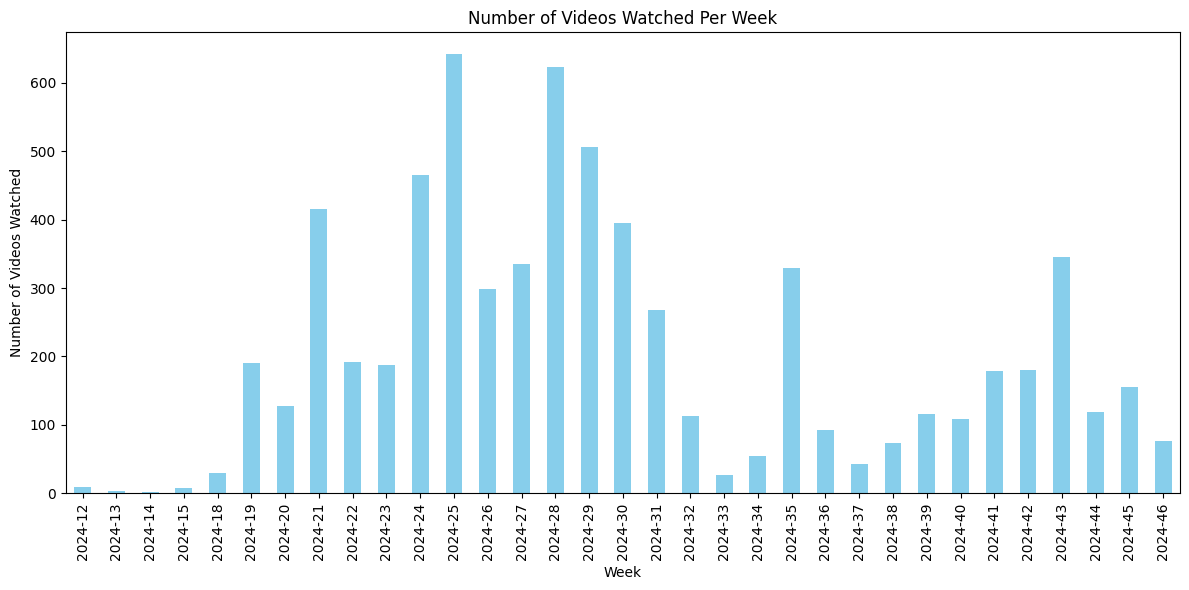

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
videos_per_week.plot(kind='bar', color='skyblue')
plt.title('Number of Videos Watched Per Week')
plt.xlabel('Week')
plt.ylabel('Number of Videos Watched')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
video_counts_per_week = yt_hist_cleaned.groupby(['video_type', 'year_week']).size().reset_index(name='videos_watched')

In [ ]:
video_counts_per_week

,video_type,year_week,videos_watched
0,Long Form Video,2024-12,8
1,Long Form Video,2024-13,3
2,Long Form Video,2024-14,1
3,Long Form Video,2024-15,5
4,Long Form Video,2024-18,25
5,Long Form Video,2024-19,169
6,Long Form Video,2024-20,108
7,Long Form Video,2024-21,300
8,Long Form Video,2024-22,123
9,Long Form Video,2024-23,131


In [ ]:
shorts_video_counts = video_counts_per_week[video_counts_per_week['video_type'] == 'Shorts']
shorts_video_counts

,video_type,year_week,videos_watched
33,Shorts,2024-12,1
34,Shorts,2024-15,3
35,Shorts,2024-18,5
36,Shorts,2024-19,22
37,Shorts,2024-20,20
38,Shorts,2024-21,116
39,Shorts,2024-22,69
40,Shorts,2024-23,57
41,Shorts,2024-24,144
42,Shorts,2024-25,225


In [ ]:
long_form_video_counts = video_counts_per_week[video_counts_per_week['video_type'] == 'Long Form Video']
long_form_video_counts

,video_type,year_week,videos_watched
0,Long Form Video,2024-12,8
1,Long Form Video,2024-13,3
2,Long Form Video,2024-14,1
3,Long Form Video,2024-15,5
4,Long Form Video,2024-18,25
5,Long Form Video,2024-19,169
6,Long Form Video,2024-20,108
7,Long Form Video,2024-21,300
8,Long Form Video,2024-22,123
9,Long Form Video,2024-23,131


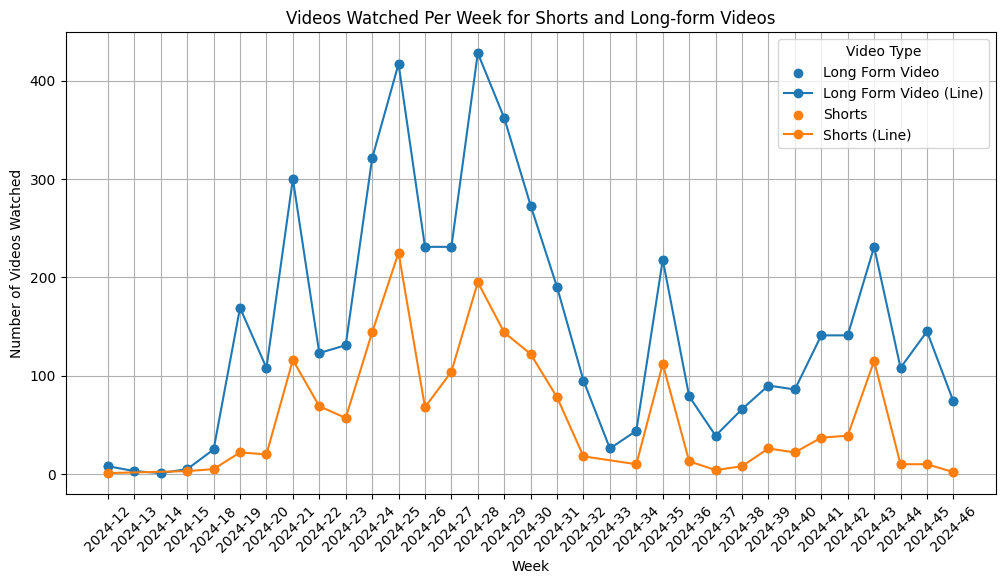

In [ ]:
# Combine the data for both Shorts and Long-form videos into one DataFrame for plotting
combined_video_counts = pd.concat([shorts_video_counts, long_form_video_counts])

# Ensure data is sorted properly
combined_video_counts = combined_video_counts.sort_values(by=['video_type', 'year_week'])

# Create the plot
plt.figure(figsize=(12, 6))

# Plot each video type separately to avoid incorrect connections
for video_type in combined_video_counts['video_type'].unique():
    subset = combined_video_counts[combined_video_counts['video_type'] == video_type]
    plt.scatter(subset['year_week'], subset['videos_watched'], label=video_type)  # Use scatter for distinct points
    plt.plot(subset['year_week'], subset['videos_watched'], marker='o', linestyle='-', label=f"{video_type} (Line)")

# Customize the plot
plt.title('Videos Watched Per Week for Shorts and Long-form Videos')
plt.xlabel('Week')
plt.ylabel('Number of Videos Watched')
plt.xticks(rotation=45)  # Rotate week labels for readability
plt.legend(title="Video Type")
plt.grid(True)

# Show the plot
plt.show()

We observe that i view long form videos more than short form videos. The peak in the graph observed is during the time i was preparing for my visa interview and getting ready to move to the US for my master education. We also observe that the viewing drops drastically once my classes begin in August.

In [ ]:
yt_hist_cleaned.head()

,titleUrl,time,video_id,video_title,year,month,day,time_of_day,video_type,date,week,year_week
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,dto8jGMxHxY,How to download your Youtube watch history,2024,11,14,04:45:03,Long Form Video,2024-11-14,46,2024-46
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,2024,11,14,04:39:53,Long Form Video,2024-11-14,46,2024-46
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,LktbfHdEm-U,Business Analyst Training Full course (Step b...,2024,11,14,04:39:40,Long Form Video,2024-11-14,46,2024-46
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...,2024,11,14,04:33:47,Long Form Video,2024-11-14,46,2024-46
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...,2024,11,14,03:55:36,Long Form Video,2024-11-14,46,2024-46


In [ ]:
# Sort the 'year_week' column in ascending order
sorted_year_week = yt_hist_cleaned['year_week'].sort_values(ascending=True)

# Print the sorted values
print(sorted_year_week.values)


['2024-12' '2024-12' '2024-12' ... '2024-46' '2024-46' '2024-46']


In [ ]:
# Change display options to show all values in the column
pd.set_option('display.max_rows', None)

# Print the sorted values of the 'year_week' column
print(yt_hist_cleaned['year_week'].sort_values(ascending=True))

6707    2024-12
6699    2024-12
6700    2024-12
6701    2024-12
6706    2024-12
6703    2024-12
6705    2024-12
6702    2024-12
6704    2024-12
6698    2024-13
6697    2024-13
6696    2024-13
6695    2024-14
6687    2024-15
6688    2024-15
6690    2024-15
6689    2024-15
6692    2024-15
6693    2024-15
6694    2024-15
6691    2024-15
6664    2024-18
6669    2024-18
6668    2024-18
6667    2024-18
6665    2024-18
6663    2024-18
6657    2024-18
6661    2024-18
6660    2024-18
6659    2024-18
6658    2024-18
6670    2024-18
6662    2024-18
6671    2024-18
6666    2024-18
6673    2024-18
6672    2024-18
6686    2024-18
6685    2024-18
6683    2024-18
6682    2024-18
6681    2024-18
6680    2024-18
6684    2024-18
6678    2024-18
6677    2024-18
6676    2024-18
6675    2024-18
6674    2024-18
6679    2024-18
6533    2024-19
6525    2024-19
6532    2024-19
6531    2024-19
6530    2024-19
6529    2024-19
6528    2024-19
6527    2024-19
6526    2024-19
6524    2024-19
6517    2024-19
6522    

VIEWS DURING SEPTEMBER

In [ ]:
september_data = yt_hist_cleaned[(yt_hist_cleaned['month'] == 9) | (yt_hist_cleaned['month'] == 10)  ]
september_data.head()


,titleUrl,time,video_id,video_title,year,month,day,time_of_day,video_type,date,week,year_week
303,https://www.youtube.com/watch?v=20xqE72iMyw,2024-10-31 20:56:39.917000+00:00,20xqE72iMyw,FnF Banned On Twitch... Fresh Finally Stands ...,2024,10,31,20:56:39,Long Form Video,2024-10-31,44,2024-44
304,https://www.youtube.com/watch?v=pRGsLghDiUM,2024-10-31 20:53:51.764000+00:00,pRGsLghDiUM,Andy Richter's Greatest Comebacks & One-Liners...,2024,10,31,20:53:51,Long Form Video,2024-10-31,44,2024-44
305,https://www.youtube.com/watch?v=fybq6V74qRk,2024-10-31 20:53:37.715000+00:00,fybq6V74qRk,The Woman Who Helps NBA Stars To Sleep: Stop H...,2024,10,31,20:53:37,Long Form Video,2024-10-31,44,2024-44
306,https://www.youtube.com/watch?v=7BAyzpghEg8,2024-10-31 20:52:53.010000+00:00,7BAyzpghEg8,Crafting FATAL Indian Blades | Forged in Fire,2024,10,31,20:52:53,Long Form Video,2024-10-31,44,2024-44
307,https://www.youtube.com/watch?v=miQuVSiRNro,2024-10-31 20:52:30.979000+00:00,miQuVSiRNro,A Tale of Two Genders: Gen Z's Insane Partisan...,2024,10,31,20:52:30,Long Form Video,2024-10-31,44,2024-44


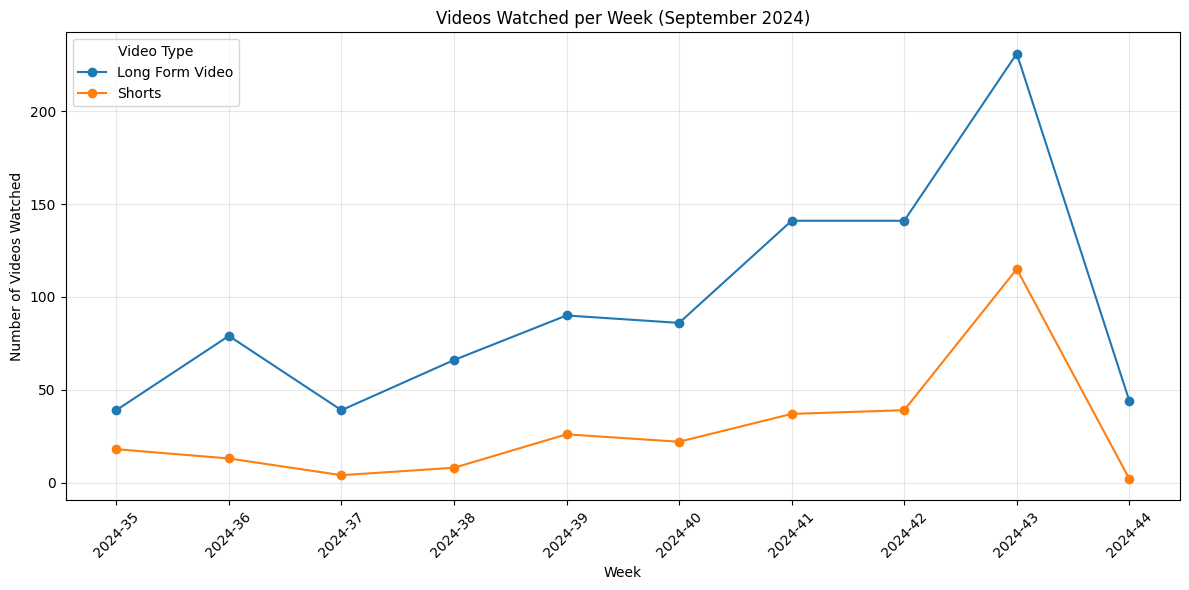

In [ ]:
# Data preparation
september_data = yt_hist_cleaned[(yt_hist_cleaned['month'] == 9) | (yt_hist_cleaned['month'] == 10)]
september_video_counts = september_data.groupby(['year_week', 'video_type']).size().reset_index(name='video_count')

# Pivot data for Matplotlib plotting
pivot_data = september_video_counts.pivot(index='year_week', columns='video_type', values='video_count')

# Create figure and axis
plt.figure(figsize=(12, 6))

# Plot each video type
for column in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[column], marker='o', label=column)

# Configure plot appearance
plt.title("Videos Watched per Week (September 2024)")
plt.xlabel("Week")
plt.ylabel("Number of Videos Watched")
plt.xticks(rotation=45)
plt.legend(title="Video Type")
plt.grid(True, alpha=0.3)
plt.tight_layout()

# Show plot
plt.show()

NUMBER OF VIDEOS WATCHED PER MONTH

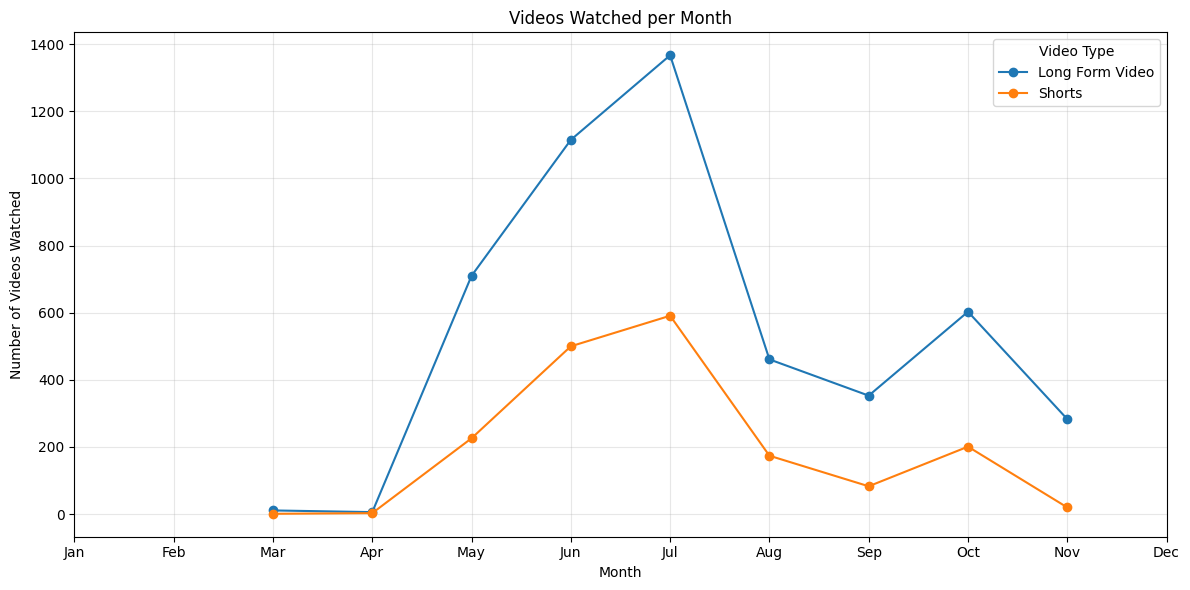

In [ ]:
# Group the data by 'year', 'month', and 'video_type', then count the number of videos watched
monthly_video_counts = yt_hist_cleaned.groupby(['year', 'month', 'video_type']).size().reset_index(name='video_count')

# Pivot the data for easier plotting
pivot_data = monthly_video_counts.pivot(index=['year', 'month'], columns='video_type', values='video_count').reset_index()

# Create figure and axis
plt.figure(figsize=(12, 6))

# Plot each video type
for column in pivot_data.columns[2:]:  # Skip 'year' and 'month' columns
    plt.plot(pivot_data['month'], pivot_data[column], marker='o', label=column)

# Configure plot appearance
plt.title("Videos Watched per Month")
plt.xlabel("Month")
plt.ylabel("Number of Videos Watched")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title="Video Type")
plt.grid(True, alpha=0.3)

# Add year to x-axis labels if data spans multiple years
if pivot_data['year'].nunique() > 1:
    plt.gca().set_xticklabels([f"{m}\n{y}" for m, y in zip(plt.gca().get_xticklabels(), pivot_data['year'])])

plt.tight_layout()

# Show plot
plt.show()


In [ ]:
most_viewed = df.groupby(['month','video_title','video_id']).size().reset_index(name='count')

In [ ]:
top_videos_by_month = most_viewed.groupby('month').apply(
    lambda x: x.nlargest(5, 'count')
).reset_index(drop=True)

/var/folders/c_/00b27xv544j989xscl_64z100000gn/T/ipykernel_1528/1902084312.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



TOP 5 MOST WATCHED VIDEOS EACH MONTH

In [ ]:
top_videos_by_month

,month,video_title,video_id,count
0,3,How 290lb BEAST Lifts TINY Weights To Get Huge...,w6BZf78CtZQ,1
1,3,Muslim CONFRONTS a Christian,3yxnG-QJrAI,1
2,3,Muslim Leaves Atheist With A Test (The Test Pa...,hdI4cbHwMqA,1
3,3,NYPD Cop Uncovers Satanic Cult & More Stories ...,ghkR3DDcaJw,1
4,3,SHUTTER ISLAND | We Were WRONG About The ENDING,3fWXnnBwYqU,1
5,4,"""Did you guys get a group rate or something?""😂",Lk43NBGnlVg,1
6,4,Breaking Down Drake and Future's Beef,lW4VR1DTXz8,1
7,4,Day 97 Self challenge/100 #75challenge #75hard...,z-fBJw2LEvo,1
8,4,Do women go for personality more than looks?,MA91MyzNVag,1
9,4,Food Expert EXPOSES Prime,D_rsF_ThVc8,1


One thing we observe is that there is recurring theme of sleep meditation music in the top 5 each month. This is because i have trouble sleeping and to help myself fall asleep i listen to these videos on most nights. The 2nd most common theme is comedy. We will explore this further below.

In [ ]:
dates_list = df['date'].to_list()

In [ ]:
df['day_of_week'] = df['date'].dt.day_name()

In [ ]:
yt_hist_cleaned.shape

(6708, 13)

day_of_week
Monday        913
Tuesday      1186
Wednesday    1151
Thursday      769
Friday       1112
Saturday      686
Sunday        891
Name: count, dtype: int64


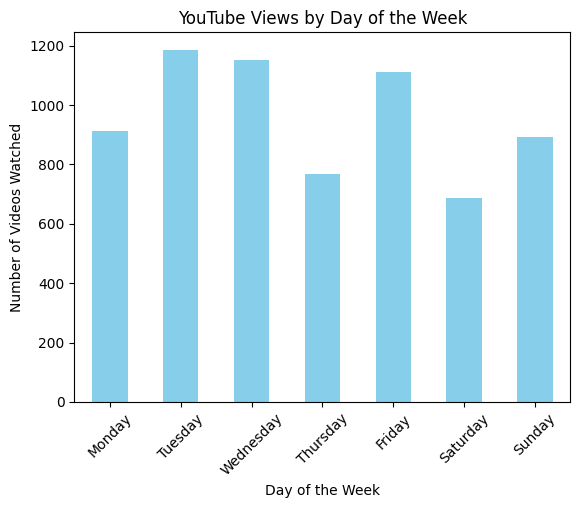

In [ ]:
# Count the number of videos watched on each day of the week
day_counts = df['day_of_week'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Display the results
print(day_counts)

# Optionally, you can visualize this using a bar chart
import matplotlib.pyplot as plt

day_counts.plot(kind='bar', color='skyblue', title='YouTube Views by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Videos Watched')
plt.xticks(rotation=45)
plt.show()


Analyzing my youtube usage against the time of day

In [ ]:
df.head()

,titleUrl,time,video_id,video_title,year,month,day,time_of_day,video_type,date,week,year_week,day_of_week
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,dto8jGMxHxY,How to download your Youtube watch history,2024,11,14,04:45:03,Long Form Video,2024-11-14,46,2024-46,Thursday
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,2024,11,14,04:39:53,Long Form Video,2024-11-14,46,2024-46,Thursday
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,LktbfHdEm-U,Business Analyst Training Full course (Step b...,2024,11,14,04:39:40,Long Form Video,2024-11-14,46,2024-46,Thursday
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...,2024,11,14,04:33:47,Long Form Video,2024-11-14,46,2024-46,Thursday
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...,2024,11,14,03:55:36,Long Form Video,2024-11-14,46,2024-46,Thursday


In [ ]:
# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Function to convert time to 12-hour format with AM/PM
def convert_to_12hr(time):
    return time.strftime('%I:%M:%S %p')

# Apply the conversion function
df['time_12hr'] = df['time'].apply(convert_to_12hr)

# Display the modified DataFrame
df.head()

,titleUrl,time,video_id,video_title,year,month,day,time_of_day,video_type,date,week,year_week,day_of_week,time_12hr
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,dto8jGMxHxY,How to download your Youtube watch history,2024,11,14,04:45:03,Long Form Video,2024-11-14,46,2024-46,Thursday,04:45:03 AM
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,2024,11,14,04:39:53,Long Form Video,2024-11-14,46,2024-46,Thursday,04:39:53 AM
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,LktbfHdEm-U,Business Analyst Training Full course (Step b...,2024,11,14,04:39:40,Long Form Video,2024-11-14,46,2024-46,Thursday,04:39:40 AM
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...,2024,11,14,04:33:47,Long Form Video,2024-11-14,46,2024-46,Thursday,04:33:47 AM
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...,2024,11,14,03:55:36,Long Form Video,2024-11-14,46,2024-46,Thursday,03:55:36 AM


In [ ]:
# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Function to convert time to 12-hour format with PM for 3-8 AM range
def convert_to_pm(time):
    if 3 <= time.hour < 8:  # Check if the hour is between 3 AM and 8 AM
        time = time.replace(hour=time.hour + 12)  # Convert to PM
    return time.strftime('%Y-%m-%d %I:%M:%S.%f %p')

# Apply the conversion function
df['time_12hr'] = df['time'].apply(convert_to_pm)

# Display the modified DataFrame
print(df[['titleUrl', 'time', 'time_12hr']])

                                         titleUrl  \
0     https://www.youtube.com/watch?v=dto8jGMxHxY   
1     https://www.youtube.com/watch?v=wObV_hwu2QM   
2     https://www.youtube.com/watch?v=LktbfHdEm-U   
3     https://www.youtube.com/watch?v=YJucKlGa0ZE   
4     https://www.youtube.com/watch?v=SN8ZHFp_plw   
5     https://www.youtube.com/watch?v=kliFaScJfTg   
6     https://www.youtube.com/watch?v=QhjcEyj181s   
7     https://www.youtube.com/watch?v=z26zbiGJnd4   
8     https://www.youtube.com/watch?v=ZXmbb5fPfgk   
9     https://www.youtube.com/watch?v=XL4NgC6a3yM   
10    https://www.youtube.com/watch?v=-CRLV4l9UtI   
11    https://www.youtube.com/watch?v=dahrmqT5GD4   
12    https://www.youtube.com/watch?v=YSRZhwtUMKI   
13    https://www.youtube.com/watch?v=Ipe9xJCfuTM   
14    https://www.youtube.com/watch?v=jdguVU0F7fs   
15    https://www.youtube.com/watch?v=KlYPmg30vn8   
16    https://www.youtube.com/watch?v=AmALRUp1okc   
17    https://www.youtube.com/watch?v=9Waa1oog

<Figure size 1000x600 with 0 Axes>

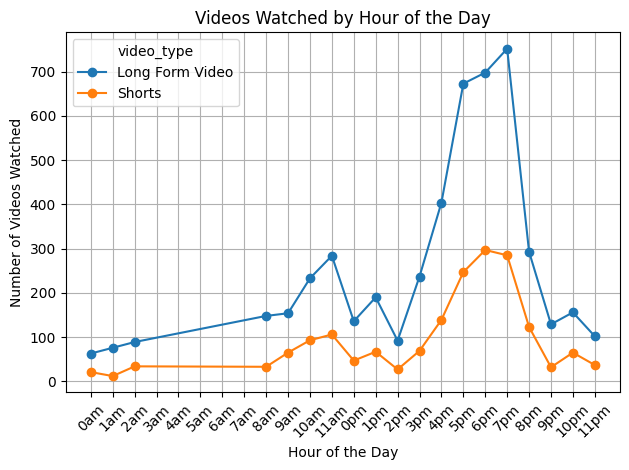

In [ ]:
# Convert 'time_12hr' to datetime
df['time_12hr'] = pd.to_datetime(df['time_12hr'], format='%Y-%m-%d %I:%M:%S.%f %p')

# Extract hour from 'time_12hr'
df['hour'] = df['time_12hr'].dt.hour

# Count videos per hour
video_counts = df.groupby(['hour', 'video_type']).size().unstack(fill_value=0)

# Plot the graph
plt.figure(figsize=(10,6))

# Plot both lines for Long Form Video and Shorts
video_counts.plot(kind='line', marker='o')

# Set labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Videos Watched')
plt.title('Videos Watched by Hour of the Day')
plt.xticks(range(0, 24), [f'{i}am' if i < 12 else f'{i-12}pm' for i in range(24)], rotation=45)

# Display the graph
plt.grid(True)
plt.tight_layout()
plt.show()

Inference: We observe that i watch youtube the most during the times i eat ( breakfast , lunch and dinner time). My most frequent time is peaked 7pm and this is usually when i used to get back home from the gym and relax for a while by watching some videos.

TRENDING KEYWORDS FROM VIDEO TITLES

In [ ]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 168 kB 7.6 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

comedy        189
shane         152
gillis        149
interview     144
viral         130
best          130
tony          129
meditation    125
joe           121
andrew        119
dtype: int64


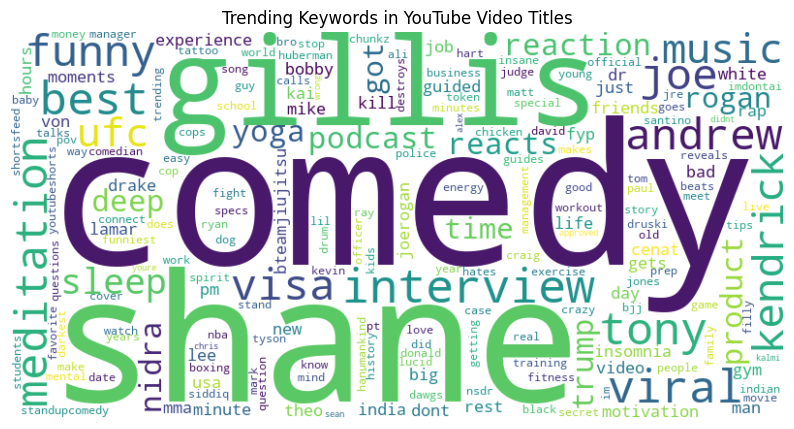

In [ ]:
# Preprocess titles: lowercase, remove special characters, and remove "Shorts"
def preprocess_title(title):
    # Remove non-alphabet characters and lowercase everything
    title = re.sub(r'[^a-zA-Z\s]', '', title.lower())
    # Remove the word "shorts"
    title = re.sub(r'\bshorts\b|\bft\b|\bvs\b|\blike\b', '', title)
    return title

df['cleaned_title'] = df['video_title'].apply(preprocess_title)

# Tokenize and count word frequencies
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['cleaned_title'])

# Get word frequencies
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=df.index)
word_freq = word_freq.sum().sort_values(ascending=False)

# Display the most frequent keywords
print(word_freq.head(10))

# Generate a word cloud of the most frequent keywords
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Trending Keywords in YouTube Video Titles")
plt.show()

Rewatching behaviour analysis

In [ ]:
df.head()

,titleUrl,time,video_id,video_title,year,month,day,time_of_day,video_type,date,week,year_week,day_of_week,time_12hr,hour,cleaned_title
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,dto8jGMxHxY,How to download your Youtube watch history,2024,11,14,04:45:03,Long Form Video,2024-11-14,46,2024-46,Thursday,2024-11-14 16:45:03.422,16,how to download your youtube watch history
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,2024,11,14,04:39:53,Long Form Video,2024-11-14,46,2024-46,Thursday,2024-11-14 16:39:53.209,16,portfolio projects to add to your data portfolio
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,LktbfHdEm-U,Business Analyst Training Full course (Step b...,2024,11,14,04:39:40,Long Form Video,2024-11-14,46,2024-46,Thursday,2024-11-14 16:39:40.499,16,business analyst training full course step by...
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...,2024,11,14,04:33:47,Long Form Video,2024-11-14,46,2024-46,Thursday,2024-11-14 16:33:47.773,16,fastest way to become a business analyst busin...
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...,2024,11,14,03:55:36,Long Form Video,2024-11-14,46,2024-46,Thursday,2024-11-14 15:55:36.705,15,day in the life of a business analyst at spoti...


In [ ]:
# Count the number of times each video title appears (rewatching count)
rewatch_count = df['video_title'].value_counts()

# Display rewatching behavior
print("Rewatching Behavior (Video Titles and Rewatch Count):")
print(rewatch_count)

Rewatching Behavior (Video Titles and Rewatch Count):
video_title
Yoga Nidra For Insomnia and Deep Rest - 1.5 Hours                                                       46
Connect with Spirit (Guides) Guided Meditation                                                          28
20 Minute Non-Sleep Deep Rest (NSDR) to Restore Mental & Physical Energy | Dr. Andrew Huberman          25
Sleep Guided Meditation, Meet Your Spirit Guides Whilst Sleeping, Calming Your Mind Meditation          12
Yoga Nidra Insomnia Meditation                                                                          10
40 hz binaural beats pure - No ADS, No Music                                                             8
Energy Alignment | Guided Breathwork (55 minutes)                                                        8
DOMINO EFFECT part 4: PINS & NEEDLES [FULL COMEDY SPECIAL] by Ali Siddiq                                 6
Why Toronto is the Greatest City on Earth (ft Babbu aka Prince)               

One thing we observe is that there is recurring theme of sleep meditation music in the top 5 each month. This is because i have trouble sleeping and to help myself fall asleep i listen to these videos on most nights. The 2nd most common theme is comedy. We will explore this further below.

BINGE WATCHING DAYS ANALYSIS

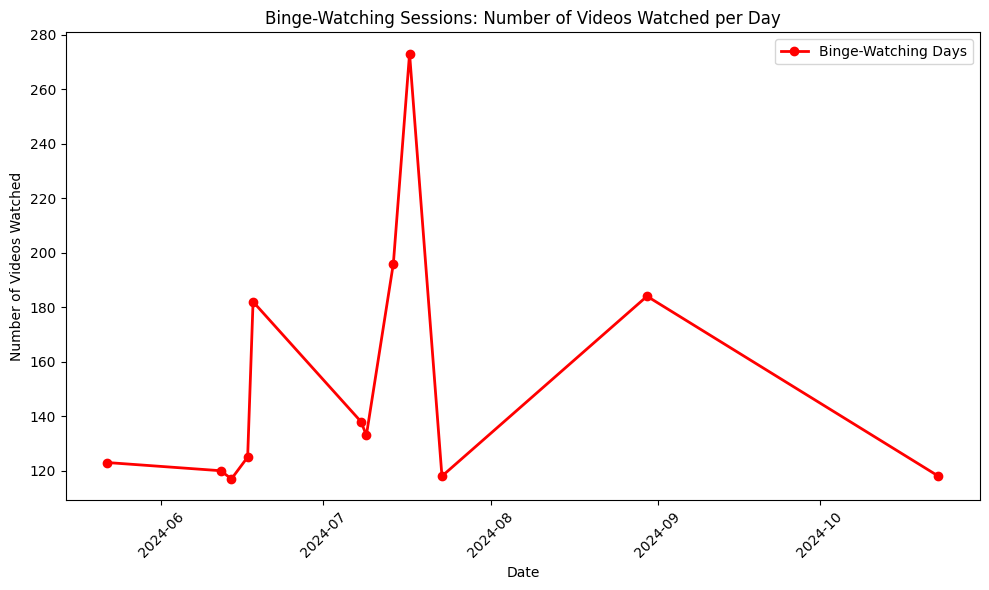

Binge-Watching Days: 
date
2024-05-22    123
2024-06-12    120
2024-06-14    117
2024-06-17    125
2024-06-18    182
2024-07-08    138
2024-07-09    133
2024-07-14    196
2024-07-17    273
2024-07-23    118
2024-08-30    184
2024-10-23    118
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named df
# Convert the 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Group by date and count the number of videos watched each day
df['date'] = df['time'].dt.date
video_count_per_day = df.groupby('date').size()

# Calculate mean and standard deviation for outlier detection
mean = video_count_per_day.mean()
std_dev = video_count_per_day.std()

# Define a binge-watching session as days with > mean + 2 * std_dev
binge_days = video_count_per_day[video_count_per_day > (mean + 2 * std_dev)]

# Plotting
plt.figure(figsize=(10, 6))

# Plot binge-watching days (red dots) and connect them with lines
plt.plot(binge_days.index, binge_days.values, marker='o', color='red', label='Binge-Watching Days', linestyle='-', linewidth=2)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Number of Videos Watched')
plt.title('Binge-Watching Sessions: Number of Videos Watched per Day')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Display binge-watching days
print("Binge-Watching Days: ")
print(binge_days)

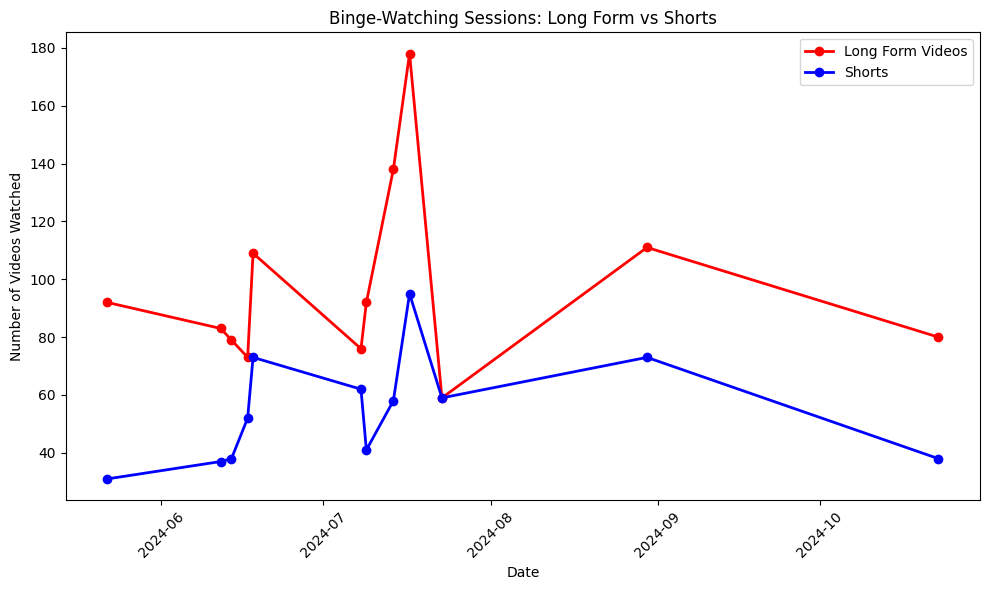

Long Form Videos Count: 
date
2024-05-22     92
2024-06-12     83
2024-06-14     79
2024-06-17     73
2024-06-18    109
2024-07-08     76
2024-07-09     92
2024-07-14    138
2024-07-17    178
2024-07-23     59
2024-08-30    111
2024-10-23     80
dtype: int64

Shorts Count: 
date
2024-05-22    31
2024-06-12    37
2024-06-14    38
2024-06-17    52
2024-06-18    73
2024-07-08    62
2024-07-09    41
2024-07-14    58
2024-07-17    95
2024-07-23    59
2024-08-30    73
2024-10-23    38
dtype: int64


In [ ]:
df['time'] = pd.to_datetime(df['time'])

# Group by date and count the number of videos watched each day
df['date'] = df['time'].dt.date
video_count_per_day = df.groupby('date').size()

# Calculate mean and standard deviation for outlier detection
mean = video_count_per_day.mean()
std_dev = video_count_per_day.std()

# Define a binge-watching session as days with > mean + 2 * std_dev
binge_days = video_count_per_day[video_count_per_day > (mean + 2 * std_dev)]

# Filter the original dataframe to include only binge-watching days
binge_videos = df[df['date'].isin(binge_days.index)]

# Separate the binge-watching videos by type
long_form_videos = binge_videos[binge_videos['video_type'] == 'Long Form Video']
shorts_videos = binge_videos[binge_videos['video_type'] == 'Shorts']

# Group by date and count the number of videos watched by type for binge-watching days
long_form_count = long_form_videos.groupby('date').size()
shorts_count = shorts_videos.groupby('date').size()

# Plotting
plt.figure(figsize=(10, 6))

# Plot the long form videos (red line) and short form videos (blue line)
plt.plot(long_form_count.index, long_form_count.values, marker='o', color='red', label='Long Form Videos', linestyle='-', linewidth=2)
plt.plot(shorts_count.index, shorts_count.values, marker='o', color='blue', label='Shorts', linestyle='-', linewidth=2)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Number of Videos Watched')
plt.title('Binge-Watching Sessions: Long Form vs Shorts')
plt.xticks(rotation=45)
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

# Display the counts for both video types
print("Long Form Videos Count: ")
print(long_form_count)
print("\nShorts Count: ")
print(shorts_count)

Video length preference

video_length_category
Long Form    4909
Shorts       1799
Name: count, dtype: int64


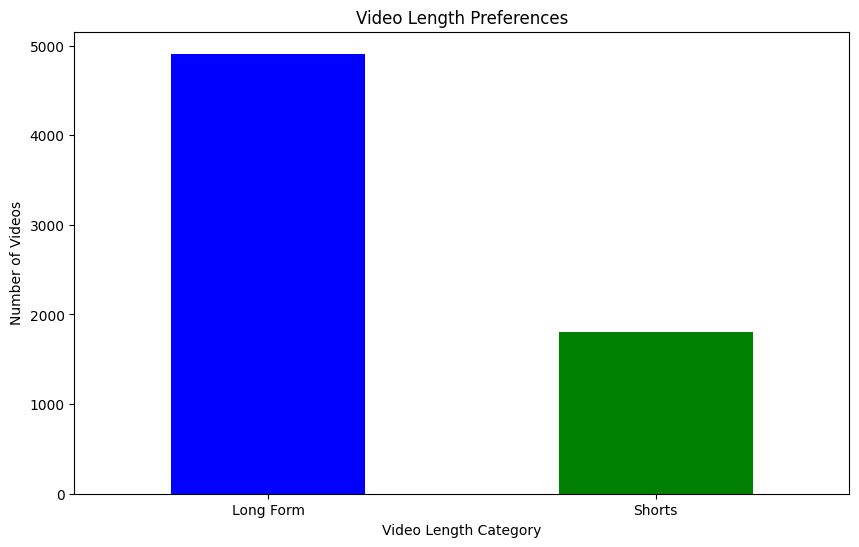

In [ ]:
# Categorize based on video type
def categorize_video_type(row):
    if 'Short' in row['video_type']:
        return 'Shorts'
    elif 'Long' in row['video_type']:
        return 'Long Form'
    else:
        return 'Other'

# Apply categorization
df['video_length_category'] = df.apply(categorize_video_type, axis=1)

# Group by the video length category and count the occurrences
length_category_count = df['video_length_category'].value_counts()

# Display the count of each category
print(length_category_count)

# Plot the results
length_category_count.plot(kind='bar', color=['blue', 'green', 'orange'], figsize=(10, 6), title="Video Length Preferences")
plt.xlabel('Video Length Category')
plt.ylabel('Number of Videos')
plt.xticks(rotation=0)
plt.show()

Most active days

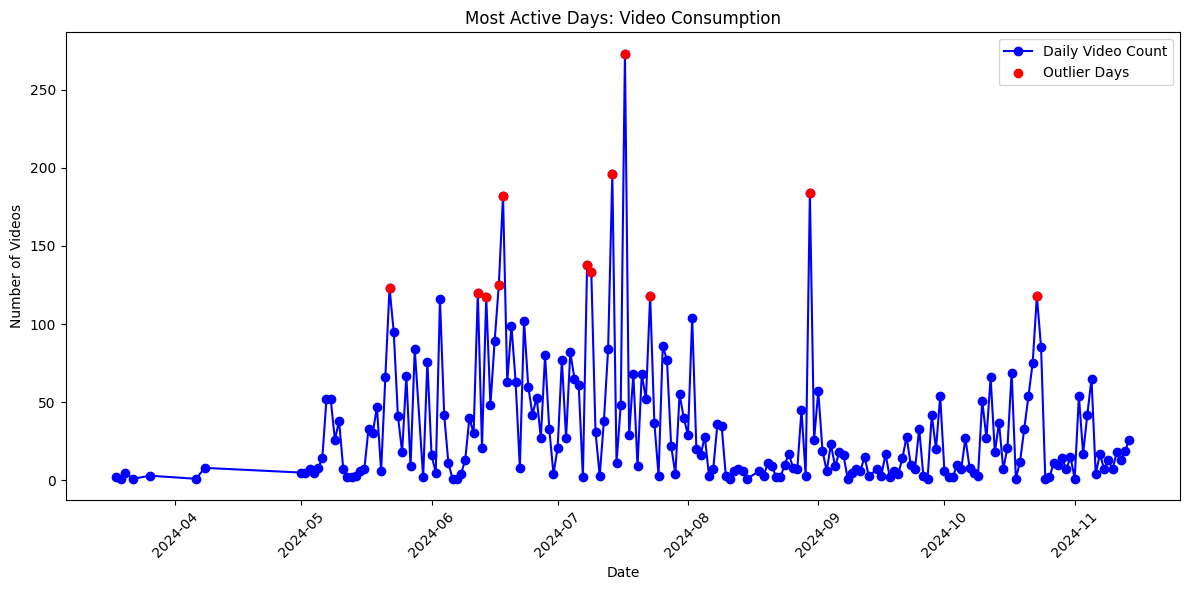

Outlier days with unusually high video consumption:
date
2024-05-22    123
2024-06-12    120
2024-06-14    117
2024-06-17    125
2024-06-18    182
2024-07-08    138
2024-07-09    133
2024-07-14    196
2024-07-17    273
2024-07-23    118
2024-08-30    184
2024-10-23    118
Name: video_id, dtype: int64


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Group by date and count the number of videos watched each day
daily_video_count = df.groupby('date')['video_id'].count()

# Calculate the Z-score to detect outliers
mean = daily_video_count.mean()
std_dev = daily_video_count.std()
z_scores = (daily_video_count - mean) / std_dev

# Define a threshold for outlier detection (e.g., Z-score > 2 or < -2)
outlier_threshold = 2
outliers = daily_video_count[z_scores.abs() > outlier_threshold]

# Plot the daily video count
plt.figure(figsize=(12, 6))
plt.plot(daily_video_count.index, daily_video_count.values, label='Daily Video Count', color='blue', marker='o')
plt.scatter(outliers.index, outliers.values, color='red', label='Outlier Days', zorder=5)
plt.title('Most Active Days: Video Consumption')
plt.xlabel('Date')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Display outlier days
print("Outlier days with unusually high video consumption:")
print(outliers)

In [ ]:
import pandas as pd

# Assuming df is your dataframe with the 'date' column
# Convert 'date' to datetime if it's not already in datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the day of the week and add it to a new column
df['day_of_week'] = df['date'].dt.day_name()

# List of outlier dates
outlier_dates = ['2024-05-22', '2024-06-12', '2024-06-14', '2024-06-17', '2024-06-18',
                 '2024-07-08', '2024-07-09', '2024-07-14', '2024-07-17', '2024-07-23',
                 '2024-08-30', '2024-10-23']

# Filter the dataframe for these outlier dates
outlier_df = df[df['date'].isin(pd.to_datetime(outlier_dates))]

# Group by 'date' and count the number of videos watched on each date
outlier_video_count = outlier_df.groupby('date').size().reset_index(name='video_count')

# Merge with the previous result to get 'day_of_week' and 'video_count' in the same table
outlier_info = pd.merge(outlier_df[['date', 'day_of_week']].drop_duplicates(),
                        outlier_video_count,
                        on='date',
                        how='left')

# Sort the outlier_info DataFrame by 'video_count' in descending order
outlier_info_sorted = outlier_info.sort_values(by='video_count', ascending=False)

# Reset the index for a clean display
outlier_info_sorted.reset_index(drop=True, inplace=True)

# Print the sorted result
print(outlier_info_sorted)

         date day_of_week  video_count
0  2024-07-17   Wednesday          273
1  2024-07-14      Sunday          196
2  2024-08-30      Friday          184
3  2024-06-18     Tuesday          182
4  2024-07-08      Monday          138
5  2024-07-09     Tuesday          133
6  2024-06-17      Monday          125
7  2024-05-22   Wednesday          123
8  2024-06-12   Wednesday          120
9  2024-10-23   Wednesday          118
10 2024-07-23     Tuesday          118
11 2024-06-14      Friday          117


boxplots

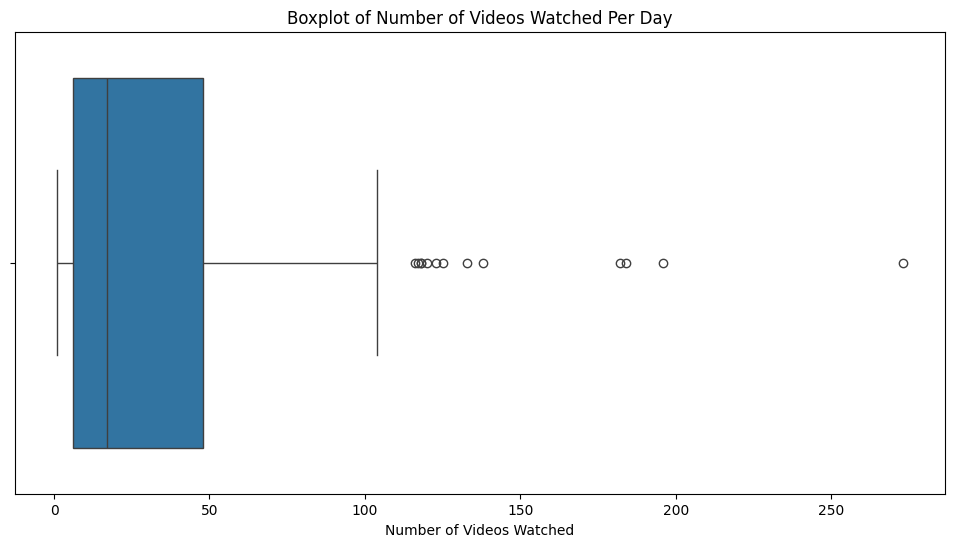

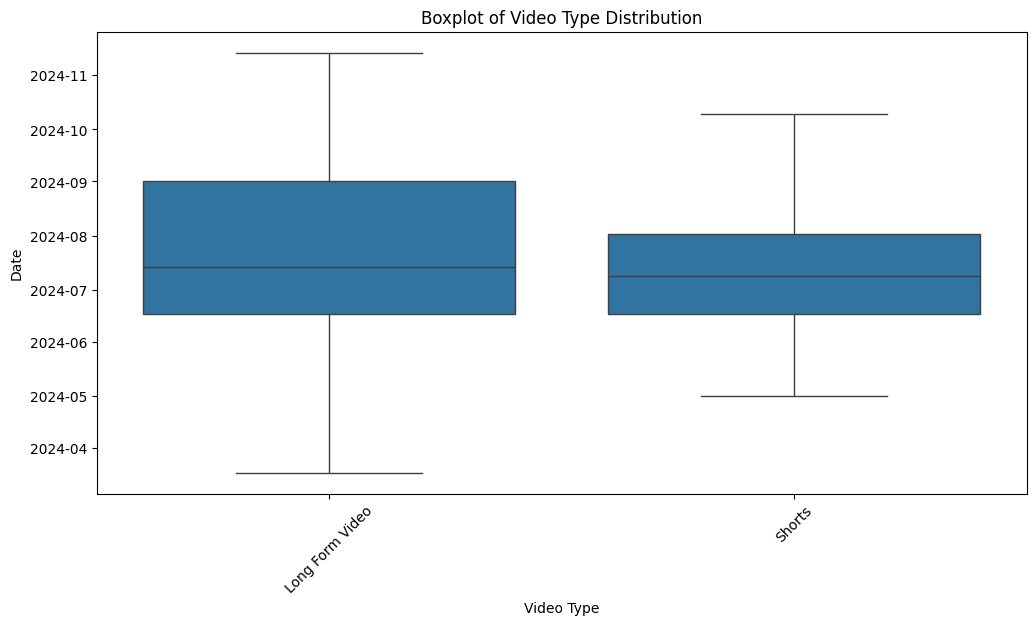

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure your 'df' is your original DataFrame
# You may need to preprocess your data to convert the time-related columns properly
# Let's assume you have 'date' and 'video_type' columns in your DataFrame

# 1. Boxplot for Number of Videos Watched per Day
# Group the data by 'date' and count the number of videos watched on each day
df['date'] = pd.to_datetime(df['date'])  # Ensure 'date' is in datetime format
videos_per_day = df.groupby('date').size()  # Get the number of videos watched each day

# Plotting
plt.figure(figsize=(12, 6))
sns.boxplot(x=videos_per_day)
plt.title('Boxplot of Number of Videos Watched Per Day')
plt.xlabel('Number of Videos Watched')
plt.show()

# 2. Boxplot for Video Type Distribution (Number of Videos by Type)
# Create a boxplot to compare the number of videos watched based on video type
plt.figure(figsize=(12, 6))
sns.boxplot(x='video_type', y='date', data=df, showfliers=False)  # showfliers=False removes outliers if needed
plt.title('Boxplot of Video Type Distribution')
plt.ylabel('Date')
plt.xlabel('Video Type')
plt.xticks(rotation=45)
plt.show()

pie charts

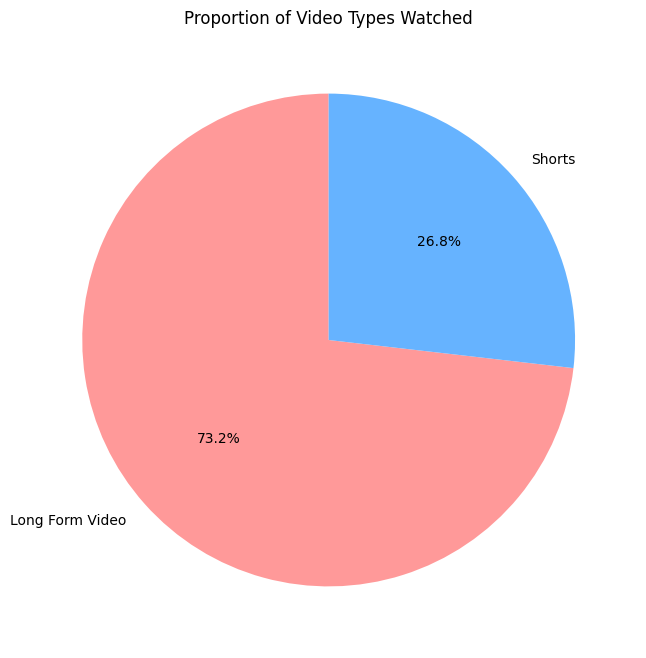

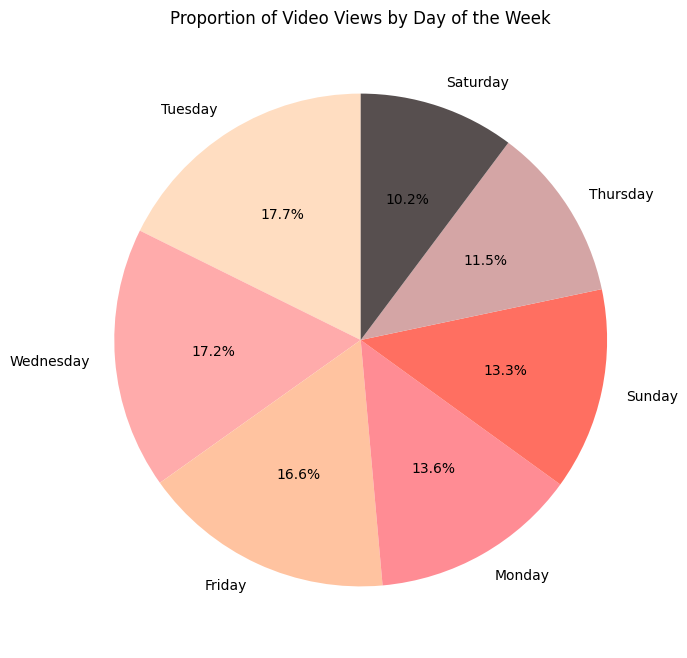

In [ ]:
# 1. Pie Chart for Video Type Proportions
video_type_counts = df['video_type'].value_counts()

# Plotting the Pie Chart
plt.figure(figsize=(8, 8))
video_type_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B3FF','#99FF99','#FFCC99'])
plt.title('Proportion of Video Types Watched')
plt.ylabel('')  # Remove y-label for better look
plt.show()

# 2. Pie Chart for Day of the Week Proportions
# First, get the day of the week
df['day_of_week'] = df['date'].dt.day_name()  # Extract the day of the week as text

day_of_week_counts = df['day_of_week'].value_counts()

# Plotting the Pie Chart
plt.figure(figsize=(8, 8))
day_of_week_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['#FFDDC1','#FFABAB','#FFC3A0','#FF8C94', '#FF6F61', '#D4A5A5', '#574F4F'])
plt.title('Proportion of Video Views by Day of the Week')
plt.ylabel('')  # Remove y-label for better look
plt.show()

CREATING INTERACTIVE PLOTS TO SEE VIEWS EACH DAY AT A WEEKLY AND MONTHLY LEVEL

In [ ]:
# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Create 'week_of_month' and 'month' columns
df['week_of_month'] = df['date'].dt.isocalendar().week % 4 + 1  # Week 1, Week 2, etc.
df['month'] = df['date'].dt.month_name()

In [ ]:
df.head()

,titleUrl,time,video_id,video_title,year,month,day,time_of_day,video_type,date,week,year_week,day_of_week,week_of_month
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,dto8jGMxHxY,How to download your Youtube watch history,2024,November,14,04:45:03,Long Form Video,2024-11-14,46,2024-46,Thursday,3
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,2024,November,14,04:39:53,Long Form Video,2024-11-14,46,2024-46,Thursday,3
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,LktbfHdEm-U,Business Analyst Training Full course (Step b...,2024,November,14,04:39:40,Long Form Video,2024-11-14,46,2024-46,Thursday,3
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...,2024,November,14,04:33:47,Long Form Video,2024-11-14,46,2024-46,Thursday,3
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...,2024,November,14,03:55:36,Long Form Video,2024-11-14,46,2024-46,Thursday,3


In [ ]:
# Group by 'month', 'week_of_month', and 'day_of_week' and count videos based on video_type
weekly_views = df.groupby(['month', 'week_of_month', 'day_of_week', 'video_type']).size().reset_index(name='videos_watched')

# Pivot the data to separate Long Form Videos and Shorts into different columns
pivoted_views = weekly_views.pivot_table(index=['month', 'week_of_month', 'day_of_week'],
                                         columns='video_type',
                                         values='videos_watched',
                                         aggfunc='sum', fill_value=0)

# Flatten the column names
pivoted_views.columns = [f'{col}_videos' for col in pivoted_views.columns]

# Reset the index to make it a clean DataFrame
pivoted_views = pivoted_views.reset_index()

# Display the result
pivoted_views

In [ ]:
# Create a custom month order to ensure chronological sorting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Convert the 'month' column to a categorical type with the defined order
pivoted_views['month'] = pd.Categorical(pivoted_views['month'], categories=month_order, ordered=True)

# Now sort the DataFrame by 'month', and optionally by 'week_of_month' and 'day_of_week'
pivoted_views = pivoted_views.sort_values(by=['month', 'week_of_month', 'day_of_week'])

# Display the result
pivoted_views.head()

,month,week_of_month,day_of_week,Long Form Video_videos,Shorts_videos
84,March,1,Friday,1,0
85,March,1,Monday,2,0
86,March,1,Tuesday,1,0
87,March,1,Wednesday,4,1
88,March,2,Tuesday,3,0


In [ ]:
import plotly.express as px

# Assuming 'pivoted_views' is the DataFrame you have after pivoting
fig = px.bar(pivoted_views,
             x='day_of_week',
             y=['Long Form Video_videos', 'Shorts_videos'],  # Long Form vs Shorts
             color='variable',  # Automatically distinguishes between Long Form and Shorts
             animation_frame='month',  # Filter by month
             animation_group='variable',  # Keeps the video types together during animation
             facet_col='week_of_month',  # Facet by week (Week 1, Week 2, etc.)
             barmode='group',
             title='YouTube Views by Day of the Week (Long Form vs Shorts)',
             labels={'day_of_week': 'Day of the Week',
                     'variable': 'Video Type',
                     'value': 'Videos Watched',
                     'month': 'Month',
                     'week_of_month': 'Week of the Month'}
            )

# Show the plot
fig.show()

In [ ]:
# Dynamically create month filter buttons based on available months in the data
month_buttons = [
    {'label': month, 'method': 'relayout', 'args': [{'xaxis.range': [0, len(pivoted_views[pivoted_views['month'] == month])]}]}
    for month in pivoted_views['month'].unique()
]

In [ ]:
import plotly.express as px

# Assuming 'pivoted_views' has columns for 'month', 'week_of_month', 'day_of_week', 'Long Form Video_videos', and 'Shorts_videos'

# Prepare the plotly bar chart
fig = px.bar(pivoted_views,
             x='day_of_week',
             y=['Long Form Video_videos', 'Shorts_videos'],
             color='variable',  # Automatically distinguishes between Long Form and Shorts
             title='YouTube Views by Day of the Week (Long Form vs Shorts)',
             labels={'day_of_week': 'Day of the Week', 'variable': 'Video Type', 'value': 'Videos Watched'},
             barmode='group')

# Add month filter using a dropdown (buttons for each month)
month_buttons = [
    {'label': month,
     'method': 'relayout',
     'args': [{'xaxis.range': [0, len(pivoted_views[pivoted_views['month'] == month])]}]}
    for month in pivoted_views['month'].unique()
]

# Update layout for the month dropdown filter
fig.update_layout(
    updatemenus=[{
        'buttons': month_buttons,
        'direction': 'down',
        'showactive': True,
        'active': 0  # Default to the first month
    }]
)

# Adding week number filter using dropdown
week_buttons = [
    {'label': f'Week {week}',
     'method': 'relayout',
     'args': [{'xaxis.range': [0, len(pivoted_views[pivoted_views["week_of_month"] == week])]}]}
    for week in range(1, 5)
]

# Update layout for the week dropdown filter
fig.update_layout(
    updatemenus=[{
        'buttons': week_buttons,
        'direction': 'down',
        'showactive': True,
        'active': 0  # Default to week 1
    }]
)

# Show the plot
fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Assuming 'pivoted_views' has columns for 'month', 'week_of_month', 'day_of_week', 'Long Form Video_videos', and 'Shorts_videos'

# Prepare the plotly bar chart
fig = px.bar(pivoted_views,
             x='day_of_week',
             y=['Long Form Video_videos', 'Shorts_videos'],
             color='variable',  # Automatically distinguishes between Long Form and Shorts
             title='YouTube Views by Day of the Week (Long Form vs Shorts)',
             labels={'day_of_week': 'Day of the Week', 'variable': 'Video Type', 'value': 'Videos Watched'},
             barmode='group')

# Create a month filter dropdown
month_buttons = [
    {'label': month,
     'method': 'relayout',
     'args': [{'xaxis.range': [0, len(pivoted_views[pivoted_views['month'] == month])]}]}
    for month in pivoted_views['month'].unique()
]

# Update layout for the month dropdown filter
fig.update_layout(
    updatemenus=[
        {
            'buttons': month_buttons,
            'direction': 'down',
            'showactive': True,
            'active': 0,  # Default to the first month in the list
            'x': 0.1,  # Adjusts the position of the dropdown
            'y': 1.15,  # Adjusts the position of the dropdown
            'xanchor': 'left',
            'yanchor': 'top'
        },
        {
            'buttons': [
                {'label': f'Week {week}', 'method': 'relayout', 'args': [{'xaxis.range': [0, len(pivoted_views[pivoted_views["week_of_month"] == week])]}]}
                for week in range(1, 5)
            ],
            'direction': 'down',
            'showactive': True,
            'active': 0,  # Default to week 1
            'x': 0.2,  # Adjusts the position of the dropdown
            'y': 1.15,  # Adjusts the position of the dropdown
            'xanchor': 'left',
            'yanchor': 'top'
        }
    ]
)

# Show the plot
fig.show()

What we have learnt from this analysis is that we have observed Patterns, trends and viewing behaviours of my personal consumption of youtube videos. I have used the analytics knowledge i have gained to identify to the parts of my day where i over induldge and make an attempt to curb such habits and adopt healthier digital habits.

Thank you for checking it out and i hope this made you atleast 1% curious to analyze your own digital habits and take the first step towards a healthier digital lifestyle.

In [ ]:
print(pivoted_views['month'].unique())

['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November']
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']


In [ ]:
weekly_views

everything below this you can basically ignore. It involves trying to extract duration of videos so that i can build a model to predict my watch time in the future. It is the next step of my project and im super excited to get it started.

In [ ]:
df.head()

,titleUrl,time,video_id,video_title,year,month,day,time_of_day,video_type,date,week,year_week,day_of_week,week_of_month
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,dto8jGMxHxY,How to download your Youtube watch history,2024,November,14,04:45:03,Long Form Video,2024-11-14,46,2024-46,Thursday,3
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,2024,November,14,04:39:53,Long Form Video,2024-11-14,46,2024-46,Thursday,3
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,LktbfHdEm-U,Business Analyst Training Full course (Step b...,2024,November,14,04:39:40,Long Form Video,2024-11-14,46,2024-46,Thursday,3
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...,2024,November,14,04:33:47,Long Form Video,2024-11-14,46,2024-46,Thursday,3
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...,2024,November,14,03:55:36,Long Form Video,2024-11-14,46,2024-46,Thursday,3


getting channel name

In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse

In [ ]:
def get_channel_name(titleurl):
    """Extracts the channel name from a YouTube watch history URL."""
    try:
        parsed_url = urlparse(titleurl)
        if not parsed_url.netloc: #Check for valid url
            return None
        response = requests.get(titleurl)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)

        soup = BeautifulSoup(response.content, 'html.parser')
        channel_link = soup.find('a', class_='yt-simple-endpoint style-scope yt-formatted-string', href=True)
        if channel_link:
            return channel_link['href'] #returns the href attribute which contains the channel name
        else:
            return None  # Handle cases where the tag is missing

    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL {titleurl}: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


## Sample DataFrame (replace with your actual data)
#
# Apply the function to the 'titleurl' column
#df['channel_name'] = df['titleurl'].apply(get_channel_name)


#df

titleurls = yt_hist_cleaned['titleUrl'].tolist()
video_ids = yt_hist_cleaned['video_id'].tolist()

# Process the lists
channel_names = []
for url in titleurls:
    channel_name = get_channel_name(url)
    channel_names.append(channel_name)

# Add the results back to the DataFrame
yt_hist_cleaned['channel_name'] = channel_names

In [ ]:
def get_channel_name(titleurl):
    try:
        response = requests.get(titleurl)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')

        # Try multiple selectors to improve robustness:
        channel_link = soup.select_one(
            'a.yt-simple-endpoint.style-scope.yt-formatted-string[href]'
        ) or soup.find('a', href=True, string=lambda text: 'channel' in text.lower())  # Alternative check

        if channel_link:
            return channel_link['href']
        else:
            print(f"Channel link not found for: {titleurl}")
            return None

    except requests.exceptions.RequestException as e:
        print(f"Error fetching URL {titleurl}: {e}")
        return None
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None

In [ ]:
a = get_channel_name('https://www.youtube.com/watch?v=dto8jGMxHxY')
print(a)

An unexpected error occurred: 'NoneType' object has no attribute 'lower'
None


In [ ]:
yt_hist_cleaned.head()

,titleUrl,time,video_id,video_title,year,month,day,time_of_day,video_type,date,week,year_week,day_of_week,week_of_month,channel_name
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,dto8jGMxHxY,How to download your Youtube watch history,2024,November,14,04:45:03,Long Form Video,2024-11-14,46,2024-46,Thursday,3,None
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,2024,November,14,04:39:53,Long Form Video,2024-11-14,46,2024-46,Thursday,3,None
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,LktbfHdEm-U,Business Analyst Training Full course (Step b...,2024,November,14,04:39:40,Long Form Video,2024-11-14,46,2024-46,Thursday,3,None
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...,2024,November,14,04:33:47,Long Form Video,2024-11-14,46,2024-46,Thursday,3,None
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...,2024,November,14,03:55:36,Long Form Video,2024-11-14,46,2024-46,Thursday,3,None


In [ ]:
df = pd.read_csv(r'/Users/tilaknarendran/Desktop/projects/youtube data analysis/youtube_history_final_dataset.csv')
df2 = pd.read_csv('/Users/tilaknarendran/Desktop/projects/youtube data analysis/appendix/youtube_history_dataset.csv')

In [ ]:
df2.shape

(9986, 8)

In [ ]:
# Replace empty strings with NaN
df2['video_title'].replace('', float('NaN'), inplace=True)

# Drop rows with NaN in the 'title' column
df_cleaned = df2.dropna(subset=['video_title'])


/var/folders/c_/00b27xv544j989xscl_64z100000gn/T/ipykernel_1528/4286086671.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [ ]:
df2.head()

,titleUrl,time,video_id,video_title,year,month,day,time_of_day
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,dto8jGMxHxY,How to download your Youtube watch history,2024,11,14,04:45:03
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,2024,11,14,04:39:53
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,LktbfHdEm-U,Business Analyst Training Full course (Step b...,2024,11,14,04:39:40
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...,2024,11,14,04:33:47
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...,2024,11,14,03:55:36


EXTRACTING VIDEO DURATION

In [ ]:
df.head()

,titleUrl,time,video_id,video_title,year,month,day,time_of_day,video_type
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,dto8jGMxHxY,How to download your Youtube watch history,2024,11,14,04:45:03,Long Form Video
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,2024,11,14,04:39:53,Long Form Video
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,LktbfHdEm-U,Business Analyst Training Full course (Step b...,2024,11,14,04:39:40,Long Form Video
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...,2024,11,14,04:33:47,Long Form Video
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...,2024,11,14,03:55:36,Long Form Video


In [ ]:
import pandas as pd
import requests

In [ ]:
from isodate import parse_duration

In [ ]:

# Function to fetch video duration using YouTube Data API
def get_video_duration(video_id, api_key):
    url = f"https://www.googleapis.com/youtube/v3/videos?part=contentDetails&id={video_id}&key={api_key}"
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for HTTP errors
        data = response.json()

        # Extract duration
        if 'items' in data and len(data['items']) > 0:
            duration = data['items'][0]['contentDetails']['duration']
            return duration
        else:
            return "Duration not available"
    except requests.exceptions.RequestException as e:
        return f"Error: {e}"

# Your API key
api_key = "your_api_key"  # Replace with your actual API key

# Example DataFrame
# df = pd.DataFrame({
#     'video_id': ['dQw4w9WgXcQ', '5NV6Rdv1a3I'],  # Replace with your actual video IDs
#     'title': ['Never Gonna Give You Up', 'Get Lucky'],
#     'link': ['https://www.youtube.com/watch?v=dQw4w9WgXcQ', 'https://www.youtube.com/watch?v=5NV6Rdv1a3I']
# })

# Fetch durations for all video IDs
df['duration'] = df['video_id'].apply(lambda vid: get_video_duration(vid, api_key))

# Convert ISO 8601 duration to seconds (handle None values)
df['duration_seconds'] = df['duration'].apply(
    lambda x: parse_duration(x).total_seconds() if pd.notna(x) and isinstance(x, str) and x.startswith('PT') else None
)

# Convert duration to human-readable format (MM:SS or HH:MM:SS)
df['duration_human'] = df['duration_seconds'].apply(
    lambda x: f"{int(x // 3600)}:{int((x % 3600) // 60):02d}:{int(x % 60):02d}" if pd.notna(x) and x >= 3600 else
              f"{int(x // 60)}:{int(x % 60):02d}" if pd.notna(x) else "N/A"
)

# Display the updated DataFrame
df.head(20)

,titleUrl,time,video_id,video_title,year,month,day,time_of_day,video_type,duration,duration_seconds,duration_human
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,dto8jGMxHxY,How to download your Youtube watch history,2024,11,14,04:45:03,Long Form Video,Error: 403 Client Error: Forbidden for url: ht...,None,N/A
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,2024,11,14,04:39:53,Long Form Video,Error: 403 Client Error: Forbidden for url: ht...,None,N/A
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,LktbfHdEm-U,Business Analyst Training Full course (Step b...,2024,11,14,04:39:40,Long Form Video,Error: 403 Client Error: Forbidden for url: ht...,None,N/A
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...,2024,11,14,04:33:47,Long Form Video,Error: 403 Client Error: Forbidden for url: ht...,None,N/A
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...,2024,11,14,03:55:36,Long Form Video,Error: 403 Client Error: Forbidden for url: ht...,None,N/A
5,https://www.youtube.com/watch?v=kliFaScJfTg,2024-11-14 03:50:55.690000+00:00,kliFaScJfTg,Young Thug Gives Heartfelt Speech Before Walki...,2024,11,14,03:50:55,Long Form Video,Error: 403 Client Error: Forbidden for url: ht...,None,N/A
6,https://www.youtube.com/watch?v=QhjcEyj181s,2024-11-14 03:45:15.181000+00:00,QhjcEyj181s,"I Wrote 100 Pages About Charisma, And I Found ...",2024,11,14,03:45:15,Long Form Video,Error: 403 Client Error: Forbidden for url: ht...,None,N/A
7,https://www.youtube.com/watch?v=z26zbiGJnd4,2024-11-14 03:44:09.470000+00:00,z26zbiGJnd4,Is This Microsoft Excel?! Financial Statistics...,2024,11,14,03:44:09,Long Form Video,Error: 403 Client Error: Forbidden for url: ht...,None,N/A
8,https://www.youtube.com/watch?v=ZXmbb5fPfgk,2024-11-14 03:43:25.667000+00:00,ZXmbb5fPfgk,I wish every Job Seeker would watch this,2024,11,14,03:43:25,Long Form Video,Error: 403 Client Error: Forbidden for url: ht...,None,N/A
9,https://www.youtube.com/watch?v=XL4NgC6a3yM,2024-11-14 03:41:05.605000+00:00,XL4NgC6a3yM,LAMP List Contact Finding,2024,11,14,03:41:05,Long Form Video,Error: 403 Client Error: Forbidden for url: ht...,None,N/A


In [ ]:
# Function to fetch video duration for multiple IDs
def get_video_durations(video_ids, api_key):
    batch_size = 50  # Max 50 IDs per API request
    durations = {}

    for i in range(0, len(video_ids), batch_size):
        batch = video_ids[i:i + batch_size]
        url = f"https://www.googleapis.com/youtube/v3/videos?part=contentDetails&id={','.join(batch)}&key={api_key}"
        try:
            response = requests.get(url)
            response.raise_for_status()
            data = response.json()

            # Extract durations
            for item in data.get('items', []):
                durations[item['id']] = item['contentDetails']['duration']
        except requests.exceptions.RequestException as e:
            print(f"Error fetching batch {batch}: {e}")

    return durations

# Your API key
api_key = "your_api_key"

# Example DataFrame
df = pd.DataFrame({
    'video_id': [f'video{i}' for i in range(1, 201)],  # Example video IDs
    'title': [f'Title {i}' for i in range(1, 201)]
})

# Process only the first 100 rows
df_subset = df.head(100)

# Fetch durations for the first 100 video IDs
video_ids = df_subset['video_id'].tolist()
durations = get_video_durations(video_ids, api_key)

# Map durations back to the subset DataFrame
df_subset['duration'] = df_subset['video_id'].map(durations)

# Convert ISO 8601 to seconds
df_subset['duration_seconds'] = df_subset['duration'].apply(
    lambda x: parse_duration(x).total_seconds() if pd.notna(x) and isinstance(x, str) and x.startswith('PT') else None
)

# Convert seconds to human-readable format
df_subset['duration_human'] = df_subset['duration_seconds'].apply(
    lambda x: f"{int(x // 3600)}:{int((x % 3600) // 60):02d}:{int(x % 60):02d}" if pd.notna(x) and x >= 3600 else
              f"{int(x // 60)}:{int(x % 60):02d}" if pd.notna(x) else "N/A"
)

# Display the updated subset DataFrame
print(df_subset)

Error fetching batch ['video1', 'video2', 'video3', 'video4', 'video5', 'video6', 'video7', 'video8', 'video9', 'video10', 'video11', 'video12', 'video13', 'video14', 'video15', 'video16', 'video17', 'video18', 'video19', 'video20', 'video21', 'video22', 'video23', 'video24', 'video25', 'video26', 'video27', 'video28', 'video29', 'video30', 'video31', 'video32', 'video33', 'video34', 'video35', 'video36', 'video37', 'video38', 'video39', 'video40', 'video41', 'video42', 'video43', 'video44', 'video45', 'video46', 'video47', 'video48', 'video49', 'video50']: 403 Client Error: Forbidden for url: https://www.googleapis.com/youtube/v3/videos?part=contentDetails&id=video1,video2,video3,video4,video5,video6,video7,video8,video9,video10,video11,video12,video13,video14,video15,video16,video17,video18,video19,video20,video21,video22,video23,video24,video25,video26,video27,video28,video29,video30,video31,video32,video33,video34,video35,video36,video37,video38,video39,video40,video41,video42,vide

/var/folders/c_/00b27xv544j989xscl_64z100000gn/T/ipykernel_1528/1921303918.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c_/00b27xv544j989xscl_64z100000gn/T/ipykernel_1528/1921303918.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/c_/00b27xv544j989xscl_64z100000gn/T/ipykernel_1528/1921303918.py:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [ ]:
df = pd.read_csv(r'/Users/tilaknarendran/Desktop/projects/youtube data analysis/youtube_history_final_dataset.csv')
df2 = pd.read_csv('/Users/tilaknarendran/Desktop/projects/youtube data analysis/appendix/youtube_history_dataset.csv')

In [ ]:
df.head()

,titleUrl,time,video_id,video_title,year,month,day,time_of_day,video_type
0,https://www.youtube.com/watch?v=dto8jGMxHxY,2024-11-14 04:45:03.422000+00:00,dto8jGMxHxY,How to download your Youtube watch history,2024,11,14,04:45:03,Long Form Video
1,https://www.youtube.com/watch?v=wObV_hwu2QM,2024-11-14 04:39:53.209000+00:00,wObV_hwu2QM,10 PORTFOLIO PROJECTS TO ADD TO YOUR DATA PORT...,2024,11,14,04:39:53,Long Form Video
2,https://www.youtube.com/watch?v=LktbfHdEm-U,2024-11-14 04:39:40.499000+00:00,LktbfHdEm-U,Business Analyst Training Full course (Step b...,2024,11,14,04:39:40,Long Form Video
3,https://www.youtube.com/watch?v=YJucKlGa0ZE,2024-11-14 04:33:47.773000+00:00,YJucKlGa0ZE,Fastest Way to Become a Business Analyst (Busi...,2024,11,14,04:33:47,Long Form Video
4,https://www.youtube.com/watch?v=SN8ZHFp_plw,2024-11-14 03:55:36.705000+00:00,SN8ZHFp_plw,day in the life of a Business Analyst at Spoti...,2024,11,14,03:55:36,Long Form Video


In [ ]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from isodate import parse_duration

In [ ]:


# Function to extract video duration by scraping YouTube
def get_video_duration_scrape(video_url):
    try:
        # Fetch the HTML content of the YouTube video page
        response = requests.get(video_url)
        response.raise_for_status()  # Ensure the request was successful

        # Parse the HTML content
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find the meta tag with the duration
        duration_meta = soup.find('meta', {'itemprop': 'duration'})
        if duration_meta and duration_meta.get('content'):
            return duration_meta['content']  # ISO 8601 format (e.g., PT3M30S)
        else:
            return "Duration not found"

    except requests.exceptions.RequestException as e:
        return f"Error: {e}"

# Function to convert ISO 8601 duration to human-readable format
def convert_to_human_readable(iso_duration):
    try:
        duration = parse_duration(iso_duration)
        total_seconds = int(duration.total_seconds())
        if total_seconds >= 3600:  # If duration is 1 hour or more
            return f"{total_seconds // 3600}:{(total_seconds % 3600) // 60:02}:{total_seconds % 60:02}"
        else:  # For durations under 1 hour
            return f"{total_seconds // 60}:{total_seconds % 60:02}"
    except Exception:
        return "Invalid duration"

# Example DataFrame
# Replace this with your actual DataFrame
# df = pd.DataFrame({
#     'video_id': ['dQw4w9WgXcQ', '5NV6Rdv1a3I', '3JZ_D3ELwOQ'],
#     'titleUrl': [
#         'https://www.youtube.com/watch?v=dQw4w9WgXcQ',
#         'https://www.youtube.com/watch?v=5NV6Rdv1a3I',
#         'https://www.youtube.com/watch?v=3JZ_D3ELwOQ'
#     ]
# })

# Apply the scraping function to get durations
df['duration_iso'] = df['titleUrl'].apply(get_video_duration_scrape)

# Convert ISO 8601 durations to human-readable format
df['duration_human'] = df['duration_iso'].apply(convert_to_human_readable)

# Display the updated DataFrame
df.head(100)


In [ ]:
df_test = df[df['duration_human']=="Invalid duration"]

In [ ]:
df_test.head()

,titleUrl,time,video_id,video_title,year,month,day,time_of_day,video_type,duration_iso,duration_human
81,https://www.youtube.com/watch?v=hUQEGZS9qbs,2024-11-10 00:14:04.347000+00:00,hUQEGZS9qbs,David Goggins: The One Second Rule,2024,11,10,00:14:04,Long Form Video,Duration not found,Invalid duration
169,https://www.youtube.com/watch?v=4gV2nFEu7lY,2024-11-05 03:27:47.242000+00:00,4gV2nFEu7lY,GET UP,2024,11,5,03:27:47,Long Form Video,Duration not found,Invalid duration
220,https://www.youtube.com/watch?v=Ld7VWE7icB8,2024-11-04 03:33:44.318000+00:00,Ld7VWE7icB8,BEST OF THE BREAKFAST CLUB'S OLD CREW (SAVAGE ...,2024,11,4,03:33:44,Long Form Video,Duration not found,Invalid duration
340,https://www.youtube.com/watch?v=CWn092lYghk,2024-10-28 18:11:17.459000+00:00,CWn092lYghk,Druski & Kai Cenat couldn't Control Themselves...,2024,10,28,18:11:17,Long Form Video,Duration not found,Invalid duration
397,https://www.youtube.com/watch?v=ZsIQ4BC9e-o,2024-10-24 22:50:28.170000+00:00,ZsIQ4BC9e-o,Bro was tryna hide behind him😭 | Part 1,2024,10,24,22:50:28,Long Form Video,Duration not found,Invalid duration


In [ ]:
df_test.head()

,titleUrl,time,video_id,video_title,year,month,day,time_of_day,video_type,duration_iso,duration_human,duration
81,https://www.youtube.com/watch?v=hUQEGZS9qbs,2024-11-10 00:14:04.347000+00:00,hUQEGZS9qbs,David Goggins: The One Second Rule,2024,11,10,00:14:04,Long Form Video,Duration not found,Invalid duration,
169,https://www.youtube.com/watch?v=4gV2nFEu7lY,2024-11-05 03:27:47.242000+00:00,4gV2nFEu7lY,GET UP,2024,11,5,03:27:47,Long Form Video,Duration not found,Invalid duration,
220,https://www.youtube.com/watch?v=Ld7VWE7icB8,2024-11-04 03:33:44.318000+00:00,Ld7VWE7icB8,BEST OF THE BREAKFAST CLUB'S OLD CREW (SAVAGE ...,2024,11,4,03:33:44,Long Form Video,Duration not found,Invalid duration,
340,https://www.youtube.com/watch?v=CWn092lYghk,2024-10-28 18:11:17.459000+00:00,CWn092lYghk,Druski & Kai Cenat couldn't Control Themselves...,2024,10,28,18:11:17,Long Form Video,Duration not found,Invalid duration,
397,https://www.youtube.com/watch?v=ZsIQ4BC9e-o,2024-10-24 22:50:28.170000+00:00,ZsIQ4BC9e-o,Bro was tryna hide behind him😭 | Part 1,2024,10,24,22:50:28,Long Form Video,Duration not found,Invalid duration,


In [ ]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.keys import Keys

# Replace with your actual credentials
email = "tilak.naren@gmail.com"
password = "Ballislife@1234#"

# Setup Selenium WebDriver (using Chrome here)
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

def sign_in_to_youtube():
    driver.get("https://www.youtube.com")

    # Wait for the sign-in button to appear and click it
    sign_in_button = driver.find_element(By.XPATH, "//yt-formatted-string[text()='Sign in']")
    sign_in_button.click()

    # Wait for the login page to load
    time.sleep(5)

    # Enter the email and submit
    email_input = driver.find_element(By.XPATH, "//input[@type='email']")
    email_input.send_keys(email)
    email_input.send_keys(Keys.RETURN)

    # Wait for the password input to load
    time.sleep(5)

    # Enter the password and submit
    password_input = driver.find_element(By.XPATH, "//input[@type='password']")
    password_input.send_keys(password)
    password_input.send_keys(Keys.RETURN)

    # Wait for the main YouTube page to load
    time.sleep(7)

    print("Successfully signed in.")

def get_video_duration(url):
    driver.get(url)

    try:
        # Wait until the video player is visible, indicating that the video page has loaded
        WebDriverWait(driver, 15).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, 'div.ytp-chrome-bottom'))
        )

        # Check if an ad is present by looking for the "Skip Ad" button
        try:
            skip_ad_button = WebDriverWait(driver, 5).until(
                EC.presence_of_element_located((By.CSS_SELECTOR, '.video-ads ytp-ad-skip-button'))
            )
            skip_ad_button.click()  # Click the "Skip Ad" button if available
            print("Ad skipped.")
        except:
            print("No ad or ad already skipped.")

        # Wait for the video to start by checking the play/pause button or other indicators
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, 'span.ytp-time-duration'))
        )

        # Extract the duration of the video
        video_duration_element = driver.find_element(By.CSS_SELECTOR, "span.ytp-time-duration")
        duration = video_duration_element.text  # Extract the text (duration)

    except Exception as e:
        duration = None  # Return None if an error occurs
        print(f"Error extracting duration for {url}: {e}")

    return duration

# Sign in to YouTube
sign_in_to_youtube()

# Sample DataFrame (Replace this with your actual DataFrame)
# data = {
#     'video_url': ['https://www.youtube.com/watch?v=dto8jGMxHxY', 'https://www.youtube.com/watch?v=wObV_hwu2QM'],  # Replace with actual video URLs
#     'video_id': ['ID1', 'ID2'],
#     'title': ['Title 1', 'Title 2']
# }
df_test = df_test.head(10)

# Loop through the DataFrame to extract durations
video_durations = []
for index, row in df_test.iterrows():
    url = row['titleUrl']
    video_duration = get_video_duration(url)
    video_durations.append(video_duration)

# Add the extracted durations as a new column to the DataFrame
df_test['duration'] = video_durations

# Show the updated DataFrame
df_test

# Close the browser once done
driver.quit()

In [ ]:
data.to_csv(r'/Users/tilaknarendran/Desktop/projects/youtube data analysis/prediction_youtube_history_dataset.csv')